**Groupe 13 :** Acciari Claire, Blart Louise <br/> 
**Article :** Bayesian Community Detection - S. L. van der Pas, A. W. van der Vaart

# Introduction 

The United States National Research Council defines Network Science as "the study of network representations of physical, biological, and social phenomena leading to predictive models of these phenomena". It is a modern academic fiels which studies complex networks, considering distinct elements, represented by nodes ( or vertices ) and connected by links ( or edges). An edge typically connects a pair of vertices. <br/> 
Community structure is one of the most widely used structures for network data : their nodes are organised into groups called communities ( or clusters). Identifying such sub-groups provides important insights into network information mechanism and how network topology affects each other. 

The community detection is an history of a Sleeping Beauty in science. Infact, the first who talked about Community structure is Zachary W.W. in 1977 \[[1](http://www1.ind.ku.dk/complexLearning/zachary1977.pdf)]. But this article was very little cited before 2002, and the publication of the first algorithm for community detection, based on modularity - M Girvan, MEJ Newman 2002 [[2](https://www.pnas.org/doi/abs/10.1073/pnas.122653799)]. <br/> 
A wide variety of methods have been proposed to estimate the latent community membership of nodes. These methods can be classified as in the User Guide of Santo Fortunato [[3](https://arxiv.org/abs/1608.00163)]:
- **The Spectral methods clustering :** approach to detect clusters using spectral properties of the graph - Luxburg 2006 [[4](https://link.springer.com/article/10.1007/s11222-007-9033-z)]. In this paper we will introduce community detection with an application of that kind of algorithms.
- **Methods based on statistical inference :** The standard approach is to fit a generative network model on the data with a Stochastic Block Model ( SBM) and maximise the log-likelihood of $P(G|\theta )$, where $\theta$ represent the propensity of vertex i of graph G, to have edges of group k $\in (1, ..., K ) $ for K communities -  Ball, Karrer, Newman 2011 [[5](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.84.036103)]
- **Methods based on optimisation :** The goal is to finding the maximum of a function indicating the quality of a clustering, over the space of all possible clusterings. The most popular quality function is the modularity by Newman and Givan 2004 [[6](https://arxiv.org/abs/cond-mat/0308217)]. We will study this algorithm to introduce the concept of modularities. Then we will focus on an other optimisation approach based on bayesian estimator. 
- **Methods based on dynamics :** Communities can also be identified by running dynamical processes on the network like diffusion or spin dynamics for example. Random walk dynamics is the most exploited :  If communities have high internal edge density and are well-separated from each other, random walkers would be trapped in each cluster for quite
some time, before finding a way out and migrating to another cluster - Pons, Latapy 2005 [[7](https://link.springer.com/chapter/10.1007/11569596_31)]. The thrid part of this work introduce that kind of dynamics algorithm


Community detection in networks is an ill-defined problem. 
There is no universal definition of community. Consequently, there are no clearcut guidelines on how to assess the performance of different algorithms and how to compare them with each other. Traditional definitions of community rely on counting edges whereas modern view rely on probabilities. In the second view, the existence of communities implies that vertices interact more strongly with the other members of their community than they do with vertices of the other communities.  Consequently, there is a preferential linking pattern between vertices of the same group, that the model have to take into account. The most famous model of networks with group structure is the stochastic block model (SBM) proposed by Fienberg and Wasserman 1981 [[8](https://www.jstor.org/stable/270741?casa_token=xwcPmGoLKyMAAAAA\%3AIfvZM1ADm3Fdfb-eargUsSKYloq0RHKlgj2-hK21lJ9FN_kLygsvsV1PJdrv-5st5BVMrxF-4SuA-QMLDD9DWfFEpLTV74B3iRWQeW_CkPJMJuai6vDX&seq=1#metadata_info_tab_contents)].


The remainder of the paper is organized as follows. In sectrion 0, we introduce the database and the notation. In Section 1, we analyse two algorithms of community detection : a spectral clustering algorithm and Newman Girvan algorithm. In Section 2, we focus on the paper Bayesian Community Detection - S.L. Van Der Pas, A.W. Van Der Vaart - 2016 [[9](https://projecteuclid.org/journals/bayesian-analysis/volume-13/issue-3/Bayesian-Community-Detection/10.1214/17-BA1078.full)]. In Section 3, we establish methods to estimate the number of communites. 

# 0 - Notations and Database

## 0.1 - Stochastic Block Model ( SBM)
Let G = (V,E) be an undirected graph with vertex (or nodes) set $V = ( v_1, ... , v_n)$ and egdes E.

The most famous model of networks with group structure is the stochastic block model (SBM) proposed by Holland et al. 1983 [[10](https://www.sciencedirect.com/science/article/pii/0378873383900217)]; Snijders and Nowicki, 1997 [[11](https://link.springer.com/article/10.1007/s003579900004)]. <br/> 
Suppose we have an undirected random graph G with n nodes numbered 1,2,...,n, and K $\in$ {1,2,...} classes. A network can be represented as an $N \times N$ adajency matrix  $𝐴 \in \{0, 1\}^{|V| \times |V|}$  represents the relation between node i and node j : $A_{ij} = 1$ when $(i,j) \in E$. We suppose that self-loops are not allowed, so $A_{ii} = 0$ for i = 1, ... , n. The generative model for the random graph is : 
- The nodes are randomly labeled with i.i.d. variables $Z_1, ... Z_n $, taking values in a finite set ${1,...,K}$ according to probabilites $\pi = (\pi_1, ... , \pi_k ) $
- Given $Z = ( Z_1, ... , Z_n )$, the edges are independently generated as Bernoulli variables with $ P(A_{ij} = 1 | Z ) = P_{Z_i ,Z_j} $ for i< j, for a given $K \times K$ symmetric matrix $P= P_{ab} $ 


## 0.2 - Data 
In this paper, we will illustrate our methods using different database : 
- [Zachary's database](http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/UciData.htm#zachary) : Zachary's karate club is a social network of a university karate club, described in the paper "An Information Flow Model for Conflict and Fission in Small Groups" by Wayne W. Zachary [[1](http://www1.ind.ku.dk/complexLearning/zachary1977.pdf)]. The network became a popular example of community structure in networks after its use by Girvan and Newman in 2002 [[2](https://www.pnas.org/doi/abs/10.1073/pnas.122653799)]. It is a network with 34 nodes and 78 edges.
- [Email-Eu-core network](https://snap.stanford.edu/data/email-Eu-core.html) : The network was generated using email data from a large European research institution. Each individual belongs to exactly one of 42 departments at the research institute. It is a network with 1005 nodes and 25571 edges.
- SBM simulation : In the second part, we will simulate several stochastic block model.

In [1]:
# Import
import networkx as nx
from scipy.linalg import fractional_matrix_power
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import time

In [2]:
# Graph :
G_Karate = nx.karate_club_graph()
path_to_file = 'C:/Users/louis/OneDrive/Documents/ENSAE/3A/S2/Compressed Sensing/projet'
G_Email = nx.read_edgelist(path_to_file+'/email-Eu-core.txt', nodetype=int)
department_labels = pd.read_table(path_to_file+"/email-Eu-core-department-labels.txt",names=['Department'], header=None, sep =' ')
department_labels_Data = department_labels.set_index(department_labels.index).to_dict('index').items()
G_Email.add_nodes_from(department_labels_Data)
Gcc_Email = sorted(nx.connected_components(G_Email), key=len, reverse=True)
# We only take the giant component
G0_Email = G_Email.subgraph(Gcc_Email[0])

### Karate Club network

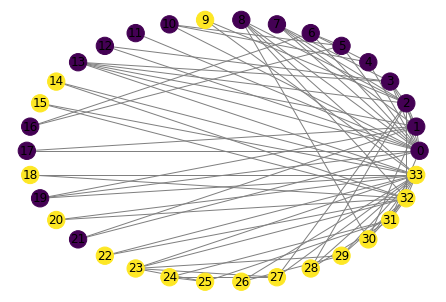

In [3]:
club_labels = nx.get_node_attributes(G_Karate,'club')
club_labels = [1*(club=='Officer') for (key, club) in club_labels.items()]
nx.draw(G_Karate, with_labels=True, node_color=club_labels, edge_color = "gray", pos=nx.circular_layout(G_Karate))

First, we list the members of the Officer club, and Mr Hi club. We also identify a list of clubs (H for Mr Hi, and O for Officer) to facilitate comparisons with the predictions of the following algorithms.

In [4]:
Hi = []
Officer = []
club = []

for i in G_Karate.nodes : 
    if G_Karate.nodes[i]['club'] == "Mr. Hi" : 
        club.append('H')
        Hi.append(i)
    else :
        Officer.append(i)
        club.append('O')
print ( ' Liste des abonnés du club de Mr Hi : ', Hi , '\n', 'Liste des abonnés du club Officer : ', Officer )
print( " Club : ", club )### Email-Eu-core network 

 Liste des abonnés du club de Mr Hi :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 16, 17, 19, 21] 
 Liste des abonnés du club Officer :  [9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
 Club :  ['H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'O', 'H', 'H', 'H', 'H', 'O', 'O', 'H', 'H', 'O', 'H', 'O', 'H', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']


### Email-Eu-core network 

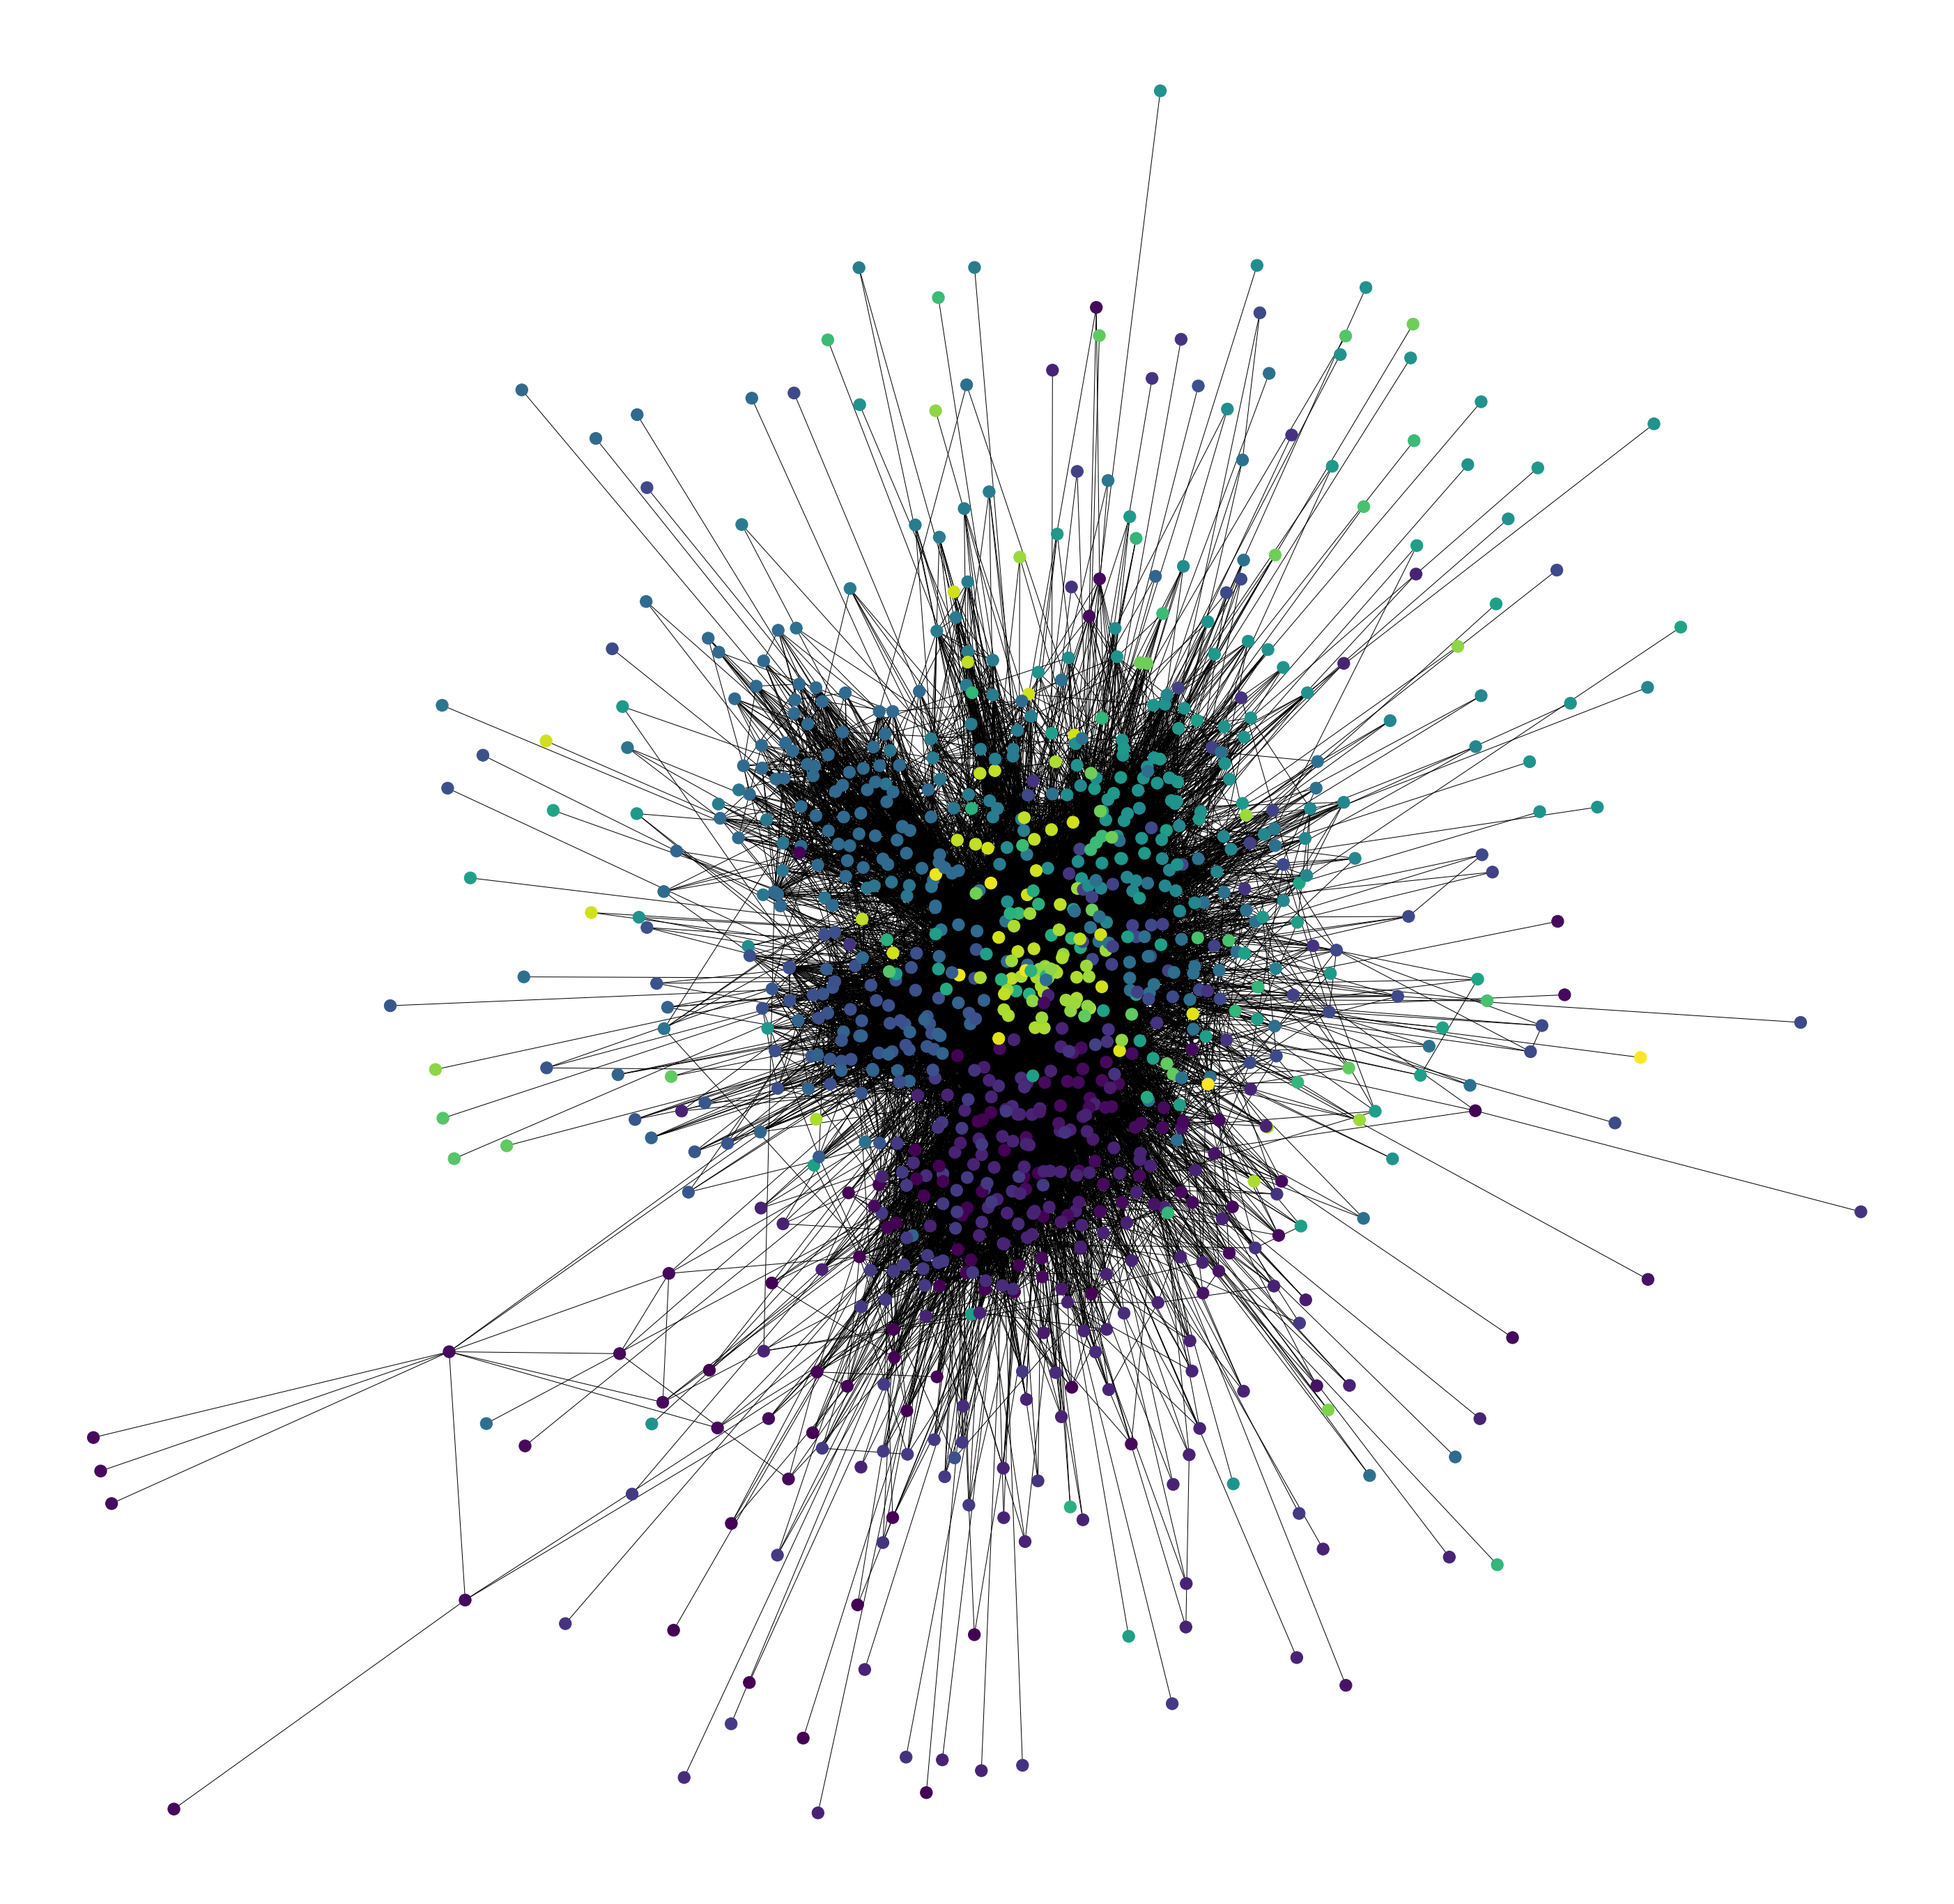

In [5]:
Dep_true = []
for i in (G0_Email.nodes()): 
    Dep_true.append(G0_Email.nodes[i]['Department'])

fig, ax = plt.subplots(figsize=(50, 50))
nx.draw(G0_Email, node_color=Dep_true )

# 1 - Basic algorithms of community detection 

To introduce the concept of community detection, we firt implement the algorithm studied in course : a spectral clustering algorithm. Spectral clustering is a popular technique going back to Donath and Hoffman (1973) [[12](https://www.worldscientific.com/doi/abs/10.1142/9789812796936_0044)] and Fiedler (1973) [[13](https://dml.cz/bitstream/handle/10338.dmlcz/101168/CzechMathJ_23-1973-2_11.pdf)]. <br/>
Spectral clustering methods have seen an explosive development and proliferation over the past few
years, thanks to Shi & Malik ( 2000 ) [[14](https://ieeexplore.ieee.org/abstract/document/868688)] and Ng, Jordan & Weiss ( 2002 ) [[15](https://ai.stanford.edu/~ang/papers/nips01-spectral.pdf)]. Contraty to traditional kmean clustering, which are based on convex set, spectral clustering do not assume hypothesis on the shape of the cluster. As a result, it can solve very general problems like intertwined spirals. <br/>
Spectral graph clustering is an approach to detect clusters using spectral properties of the graph (Fortunato, 2010 [[3](https://arxiv.org/abs/1608.00163)]). <br/>
The eigenvalue spectrum of several graph matrices typically consists of a dense bulk of closely spaced eigenvalues, plus some outlying eigenvalues. The eigenvectors corresponding to these outliers contain information about the large-scale structure of the network, like community structure. <br/>
Spectral clustering consists in generating a projection of the graph vertices in a metric space, by using the entries of those eigenvectors as coordinates. The i-th entries of the eigenvectors are the coordinates of vertex i in a k-dimensional Euclidean space, where k is the number of eigenvectors used.  <br/>
The resulting points can be grouped in clusters by using standard partitional clustering techniques like k-means clustering (MacQueen, 1967)[[16](https://books.google.fr/books?hl=fr&lr=&id=IC4Ku_7dBFUC&oi=fnd&pg=PA281&dq=k+means+(Macqueen,+1967)&ots=nPWjCYF9uO&sig=gEeHpH7XzC6GQVfLCa6A8W2vgqE#v=onepage&q=k%20means%20(Macqueen%2C%201967)&f=false )].


Accordint to Verma & Meila ( 2003 ) [[17](https://sites.stat.washington.edu/spectral/papers/UW-CSE-03-05-01.pdf)] this algorithm is efficient under few assumption : 
- the graph assume the parsimony property
- the database is not too big (at most, a few thousand nodes)

Some advantages of this method are noted by Luxburg (2006) [[18](https://link.springer.com/chapter/10.1007/11776420_4)] :
-  It is simple to implement : it can be solved efficiently by standard linear algebra software,
- It often outperforms traditional clustering algorithms such as the k-means algorithm.


## 1.1 -  Unnormalized Spectral Clustering
**Spectral clustering is a three step algorithm**
#### Step 1 :   The Laplacian Matrix L = D- A
- D denote degree matrix of the graph, which is the diagonal matrix ( of size $n \times n $ ) containing the degrees of each node : $$d_{ij} = \left\{
       \begin{array}{ll}
       deg(v_i)& \mbox{if }i = j \\
       0 & \mbox{else}
       \end{array}
       \right.$$
- A denote the adjacency matrix of size $ n \times n $
$$A_{ij} = \left\{
    \begin{array}{ll}
        1 & \mbox{if ($i$, $j$) $\in$ E }\\
        0 & \mbox{else}
    \end{array}
\right.$$

An overview over many of its properties can be found in Mohar (1997) [[19](https://link.springer.com/chapter/10.1007/978-94-015-8937-6_6)]. The following proposition of the course summarizes the most important facts needed for spectral clustering :

**Proposition 1 :** Let G = (V,E,W) a undirected weighted graph, with $W_ij \ge 0 $. For all (i,j) $\in V \times V$, we have : <br/>
1) For every vector $f \in R^{|V|}$ , $f^T L f = \frac{1}{2} \sum_{(i,j) \in E} W_{ij} ( f_i - f_j)^2 $ <br/>
2) L is symmetric and positive semi-definite <br/>
3) The smallest eigenvalue of L is 0 <br/>

An other proposition of the couse will be important for spectral clustering : 

**Proposition 2 :** Let G be an undirected graph with non-negative weights. Then the multiplicity k of the eigenvalue 0 of L equals the
number of connected components $V_1, ..., V_k $ in the graph G. The eigenspace of eigenvalue 0 is spanned by the indicator vectors $\mathbb 1 _{V_1} , ... , \mathbb 1 _{V_k} $ of those components. <br/>
We refer to the course for the proof of this two propositions.  


In [6]:
A_Karate =  nx.adjacency_matrix(G_Karate)
print( " Adjacency matrix  A : ","\n",A_Karate.todense())
D_Karate = np.diag(np.array(list(dict(G_Karate.degree()).values())))
print(" Degree matrix : ", "\n", D_Karate)
L_Karate = D_Karate - A_Karate
print(" Laplacian Matrix : ", "\n", L_Karate)

 Adjacency matrix  A :  
 [[0 1 1 ... 1 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 0 1 0]
 ...
 [1 0 0 ... 0 1 1]
 [0 0 1 ... 1 0 1]
 [0 0 0 ... 1 1 0]]
 Degree matrix :  
 [[16  0  0 ...  0  0  0]
 [ 0  9  0 ...  0  0  0]
 [ 0  0 10 ...  0  0  0]
 ...
 [ 0  0  0 ...  6  0  0]
 [ 0  0  0 ...  0 12  0]
 [ 0  0  0 ...  0  0 17]]
 Laplacian Matrix :  
 [[16 -1 -1 ... -1  0  0]
 [-1  9 -1 ...  0  0  0]
 [-1 -1 10 ...  0 -1  0]
 ...
 [-1  0  0 ...  6 -1 -1]
 [ 0  0 -1 ... -1 12 -1]
 [ 0  0  0 ... -1 -1 17]]


#### Step 2 :  eigenvalue and  eigenvectors
 We calculate the k eigenvectors ($v_0$ , ... $v_k$ ) of L corresponding to the k smallest eigenvalues  ( $\lambda_0, ... , \lambda_k$ ).

In [7]:
# Eigenvalues and eigenvectors 
eigVals, eigVecs = np.linalg.eig(L_Karate)
print("Min : " , eigVals.min())
print("Max : " , eigVals.max() )
print ("Is symmetric : " , np.allclose(L_Karate, L_Karate.T))

Min :  2.0825357961605765e-16
Max :  18.13669597300438
Is symmetric :  True


Laplacian matrix is symmetric ( $L^T = L $ ) and positive semi-definite ( the smallest eigenvalue of L is 0). Proposition 1 is verified. 

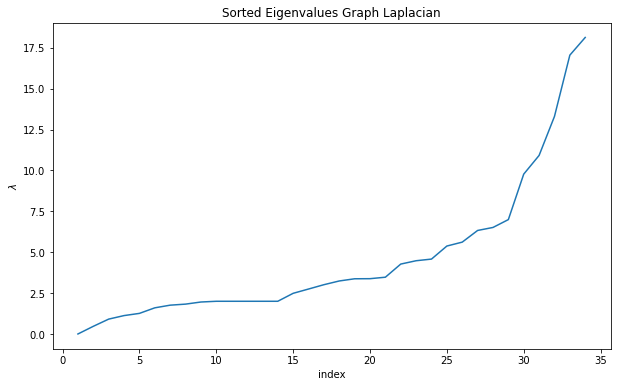

In [8]:
# ndex by ascending order
sorted_index_eigVals = np.argsort(eigVals)
# Eigenvalues byascending order
sorted_eigVals = eigVals[sorted_index_eigVals]
# Plot the graph
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x=range(1, sorted_index_eigVals.size + 1), y=sorted_eigVals, ax=ax)
ax.set(title='Sorted Eigenvalues Graph Laplacian', xlabel='index', ylabel=r'$\lambda$');

In [9]:
# Index of the 2 smallest eigenvalues
small_eigVals_index = sorted_index_eigVals[:2]
small_eigVals_index

array([ 8, 10], dtype=int64)

In [10]:
df_vectors = pd.DataFrame(eigVecs[:, small_eigVals_index.squeeze()])
df_vectors.columns = ['vector_' + str(c) for c in df_vectors.columns]
# Eigenvectors associated with the 2 smallest eigenvalues
df_vectors 

vector_0  vector_1
0  -0.171499  0.112137
1  -0.171499  0.041288
2  -0.171499 -0.023219
3  -0.171499  0.055500
4  -0.171499  0.284605
5  -0.171499  0.323727
6  -0.171499  0.323727
7  -0.171499  0.052586
8  -0.171499 -0.051601
9  -0.171499 -0.092801
10 -0.171499  0.284605
11 -0.171499  0.210993
12 -0.171499  0.109461
13 -0.171499  0.014742
14 -0.171499 -0.162751
15 -0.171499 -0.162751
16 -0.171499  0.422765
17 -0.171499  0.100181
18 -0.171499 -0.162751
19 -0.171499  0.013637
20 -0.171499 -0.162751
21 -0.171499  0.100181
22 -0.171499 -0.162751
23 -0.171499 -0.155695
24 -0.171499 -0.153026
25 -0.171499 -0.160963
26 -0.171499 -0.187110
27 -0.171499 -0.127664
28 -0.171499 -0.095152
29 -0.171499 -0.167650
30 -0.171499 -0.073500
31 -0.171499 -0.098753
32 -0.171499 -0.130345
33 -0.171499 -0.118903

#### Step 3 : K-Means Clustering
We perform a k-means on the matrix containing the k eigenvectors in columns:

Given a set of points $(x_1, x_2, …, x_n)$, we want to partition the n points (the nodes) into k sets $S = {S_1, S_2, …, S_k} $ $(k \le n)$ by minimizing the distance between points inside each partition:

$$
{\displaystyle {\underset {\mathbf {S} }{\operatorname {arg\,min} }}\sum _{i=1}^{k}\sum _{\mathbf {x} _{j}\in S_{i}}\left\|\mathbf {x} _{j}-{\boldsymbol {\mu }}_{i}\right\|^{2}}
$$ where $\mu_i$ is the barycenter of the points in $S_i$.

To select the number of clusters, we use the elbow method like proposed in the course. We run k-means for various cluster values and plot the associated inertia (sum of squared distances of samples to their closest cluster center).

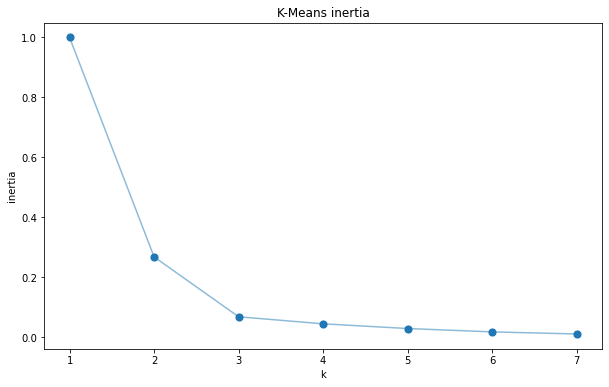

In [11]:
inertia = []

k_candidates = range(1, 8)

for k in k_candidates:
    k_means = KMeans(random_state=42, n_clusters=k)
    k_means.fit(df_vectors)
    inertia.append(k_means.inertia_)
    
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=k_candidates, y = inertia, s=80, ax=ax)
sns.lineplot(x=k_candidates, y = inertia, alpha=0.5, ax=ax)
ax.set(title='K-Means inertia', ylabel='inertia', xlabel='k');

With the elbow method we can see that spectral clustering detects 2 or 3 communities. 

In [12]:
def run_k_means(df, n_clusters):
    '''
    This function computes the K-means clustering  over df, on n-clusters.
    Args:
        df : dataframe of eigenvectors
        n_clusters: numer of clusters
    '''
    k_means = KMeans(n_clusters=n_clusters)
    k_means.fit(df)
    cluster = k_means.predict(df)
    return cluster

predict = run_k_means(df_vectors, n_clusters=2)

In [13]:
groupeA = list(np.where(np.array(predict) == 0)[0])
print('Members of group A :', groupeA)
groupeB = list(np.where(np.array(predict) == 1)[0])
print('Members of group B :', groupeB)

Members of group A : [0, 4, 5, 6, 10, 11, 12, 16, 17, 21]
Members of group B : [1, 2, 3, 7, 8, 9, 13, 14, 15, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]


In [14]:
def attribution_Hi_Officer (l1 , l2) :
    '''
    This function assigns a captain for the two lists
    Args : 
        - l1 : first list
        - l2 : second list
    '''
    difference_0_Hi= len(set(l1).difference(set(Hi)))
    difference_0_Officer = len(set(l1).difference(set(Officer)))
    difference_1_Hi= len(set(l2).difference(set(Hi)))
    difference_1_Officer = len(set(l2).difference(set(Officer)))
    
    if difference_0_Hi > difference_0_Officer and difference_1_Hi < difference_1_Officer :
        d = { 0 : 'Officer' , 1 : 'Mr. Hi' }
        print (d)
        print( ' Group ', l1, "is probably the officer's one, whereas ", l2, "is probably Mr Hi group's" )
        H = 1
        O = 0
    elif difference_0_Hi < difference_0_Officer and difference_1_Hi > difference_1_Officer :
        d = { 0 : 'Mr. Hi' , 1 :  'Officer' }
        print (d)
        H = 0 
        O = 1
        print( ' Group ', l1, "is probably Mr Hi's one, whereas ", l2, "is probably Officer's group"  )

    else : 
        d= {}
        print('Impossible to separate the two groups')
    club_num = []
    for elem in club :
        if elem == 'H': club_num.append(H)
        else : club_num.append(O)
    return club_num, d


In [16]:
club_num, d = attribution_Hi_Officer ( groupeA, groupeB )

for i in range (G_Karate.number_of_nodes() ):
    G_Karate.nodes[i]['predict'] = d[predict[i]]

{0: 'Mr. Hi', 1: 'Officer'}
 Group  [0, 4, 5, 6, 10, 11, 12, 16, 17, 21] is probably Mr Hi's one, whereas  [1, 2, 3, 7, 8, 9, 13, 14, 15, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33] is probably Officer's group


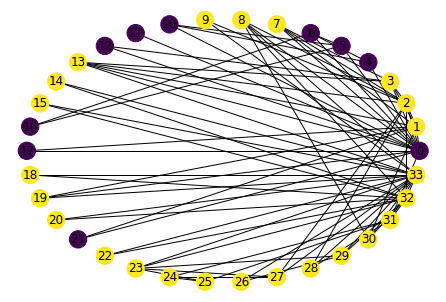

In [17]:
nx.draw_circular(G_Karate, node_color=predict, with_labels = True)

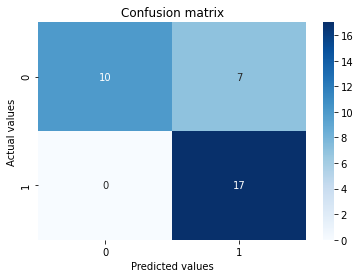

In [18]:
def plot_confusion_matrix ( y_true, y_predict) : 
    ax = sns.heatmap(confusion_matrix(y_true, y_predict), annot=True, cmap='Blues')
    ax.set_title('Confusion matrix');
    ax.set_xlabel('Predicted values')
    ax.set_ylabel('Actual values');
    return plt.show()
    
plot_confusion_matrix(club_num,predict)

Without any normalization on the Laplace matrix, classification is difficult for seven individuals, who are classified as 1 although they belong to club 0.

In [19]:
def clustering_spectral (g , n=2): 
    '''
    This function compute the  spectral clustering algorithm. It is a summary of the 3 steps. 
    Args : 
        - g :a graph 
        - n : number of clusters
    
    '''
    # Step 1
    A=nx.adjacency_matrix(g)
    D= np.diag(np.array(list(dict(g.degree()).values())))
    L = D - A
    # Step 2
    eigVals, eigVecs = np.linalg.eig(L)
    eigVals = eigVals.real
    eigVecs = eigVecs.real  
    sorted_index_eigVals = np.argsort(eigVals)
    sorted_eigVals = eigVals[sorted_index_eigVals]
    small_eigVals_index = sorted_index_eigVals[:n]
    df_vect = pd.DataFrame(eigVecs[:, small_eigVals_index.squeeze()])
    df_vect.columns = ['vector_' + str(c) for c in df_vect.columns]
    # Step 3 
    predict = run_k_means(df_vect,n_clusters = n)
    return df_vect, predict

In [20]:
df_vect, predict = clustering_spectral ( G_Karate, 3)

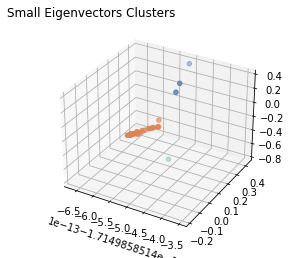

In [21]:
from mpl_toolkits.mplot3d import Axes3D
sns_c = sns.color_palette(palette='deep')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    xs=df_vect['vector_0'], 
    ys=df_vect['vector_1'], 
    zs=df_vect['vector_2'],
    c=[{0: sns_c[0], 1: sns_c[1], 2: sns_c[2]}.get(c) for c in predict]
)
ax.set_title('Small Eigenvectors Clusters', x=0.2);


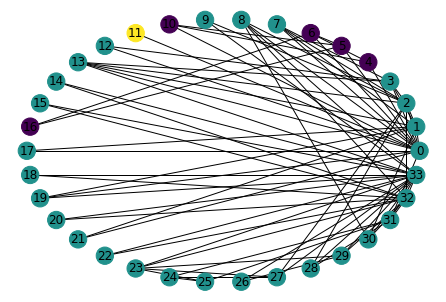

In [22]:
nx.draw_circular(G_Karate, node_color=predict, with_labels = True)

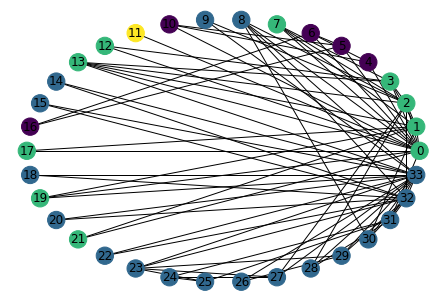

In [23]:
df_vect, predict = clustering_spectral ( G_Karate, 4)
nx.draw_circular(G_Karate, node_color=predict, with_labels = True)

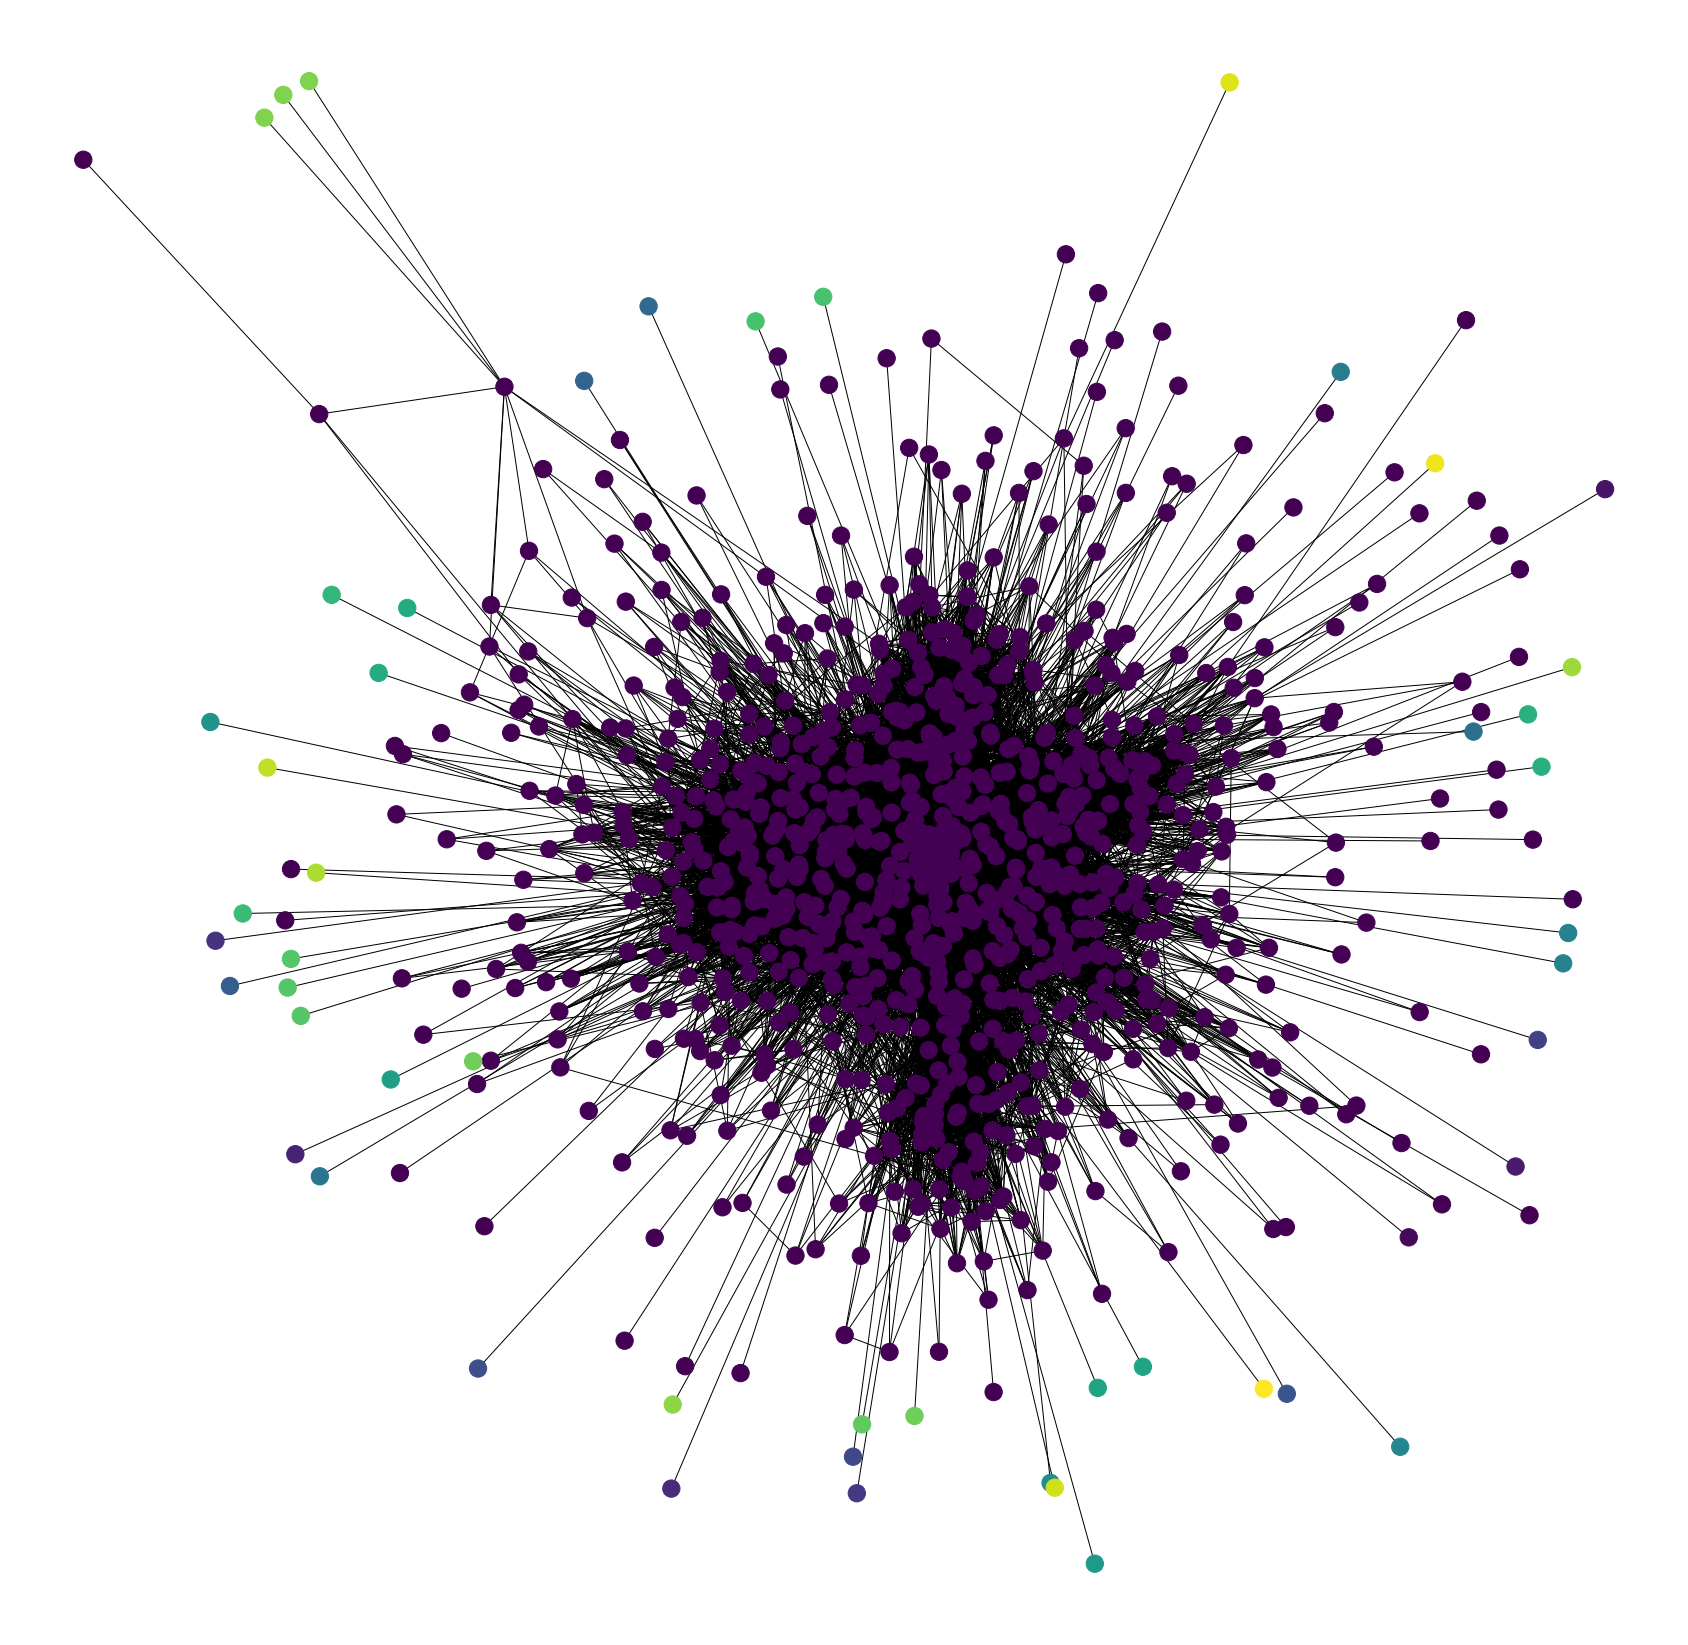

In [24]:
df_vect, predict = clustering_spectral ( G0_Email, 42) 
fig, ax = plt.subplots(figsize=(30, 30))
nx.draw(G0_Email, node_color=predict, )

With a bigger network, we can see that this spectral algorithm has difficulties to detect departments. 

## 1.2 -  Normalized spectral Clustering
Often, spectral clustering is also performed with a normalized version of the Laplacian matrix. A commun ways of normalizing L is : $L' = D^{\frac{1}{2}}LD^{\frac{1}{2}}$. 
The first argument, thanks to  Von Luxburg  [[4](https://arxiv.org/abs/0711.0189)], in favor of normalized spectral clustering comes from the graph partitioning point of view. In general, clustering has two different objectives:
- We want to find a partition such that points in different clusters are dissimilar to each other, that is we want to minimize the between-cluster similarity.
- We want to find a partition such that points in the same cluster are similar to each other, that is we want to maximize the within-cluster similarities.

Normalized spectral clustering implements both clustering objectives mentioned above, while unnormalized spectral clustering only implements the first objective.

Second argument is the convergence of the normalized graph Laplacian. Luxburg , Bousquet , Belkin - 2004 [[20](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.84.4131&rep=rep1&type=pdf)] show that spectral clustering usually converges to an intuitively appealing limit partition of the data space. In contrary, in case of the unnormalized graph Laplacian, equally strong convergence results are difficult to obtain.

In [25]:
def clustering_spectral (g , n=2, normalised_L = True): 
    '''
    This function compute the  spectral clustering algorithm. It is a summary of the 3 steps. 
    Args : 
        - g :a graph 
        - n : number of clusters
        - normalised : bolean 
    
    '''
    # Step 1
    A=nx.adjacency_matrix(g)
    D= np.diag(np.array(list(dict(g.degree()).values())))
    L = D - A
    if normalised_L == True :
         L = fractional_matrix_power(D, -0.5) @ L @  fractional_matrix_power(D, -0.5)
    # Step 2
    eigVals, eigVecs = np.linalg.eig(L)
    eigVals = eigVals.real
    eigVecs = eigVecs.real  
    sorted_index_eigVals = np.argsort(eigVals)
    sorted_eigVals = eigVals[sorted_index_eigVals]
    small_eigVals_index = sorted_index_eigVals[:n]
    df_vect = pd.DataFrame(eigVecs[:, small_eigVals_index.squeeze()])
    df_vect.columns = ['vector_' + str(c) for c in df_vect.columns]
    # Step 3 
    predict = run_k_means(df_vect,n_clusters = n)
    return df_vect, predict

In [26]:
df_vectors, predict = clustering_spectral ( G_Karate )

In [28]:
groupeA = list(np.where(np.array(predict) == 0)[0])
print('Members of group A :', groupeA)
groupeB = list(np.where(np.array(predict) == 1)[0])
print('Members of group B :', groupeB)

club_num, d = attribution_Hi_Officer ( groupeA, groupeB )

Members of group A : [0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21]
Members of group B : [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
{0: 'Mr. Hi', 1: 'Officer'}
 Group  [0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21] is probably Mr Hi's one, whereas  [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33] is probably Officer's group


In [29]:
for i in range (G_Karate.number_of_nodes() ):
    G_Karate.nodes[i]['predict'] = d[predict[i]]

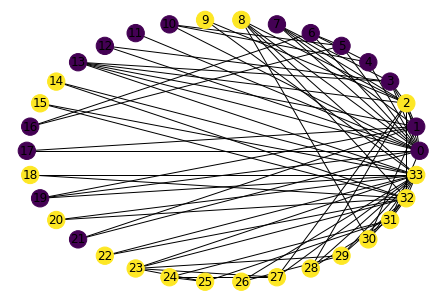

In [30]:
nx.draw_circular(G_Karate, node_color=predict, with_labels = True)

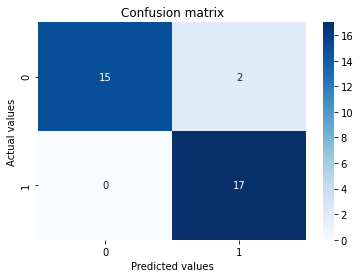

In [31]:
plot_confusion_matrix(club_num,predict)

With a normalization on the Laplace matrix, classification is less difficult. Only 2 persons are misclassified.

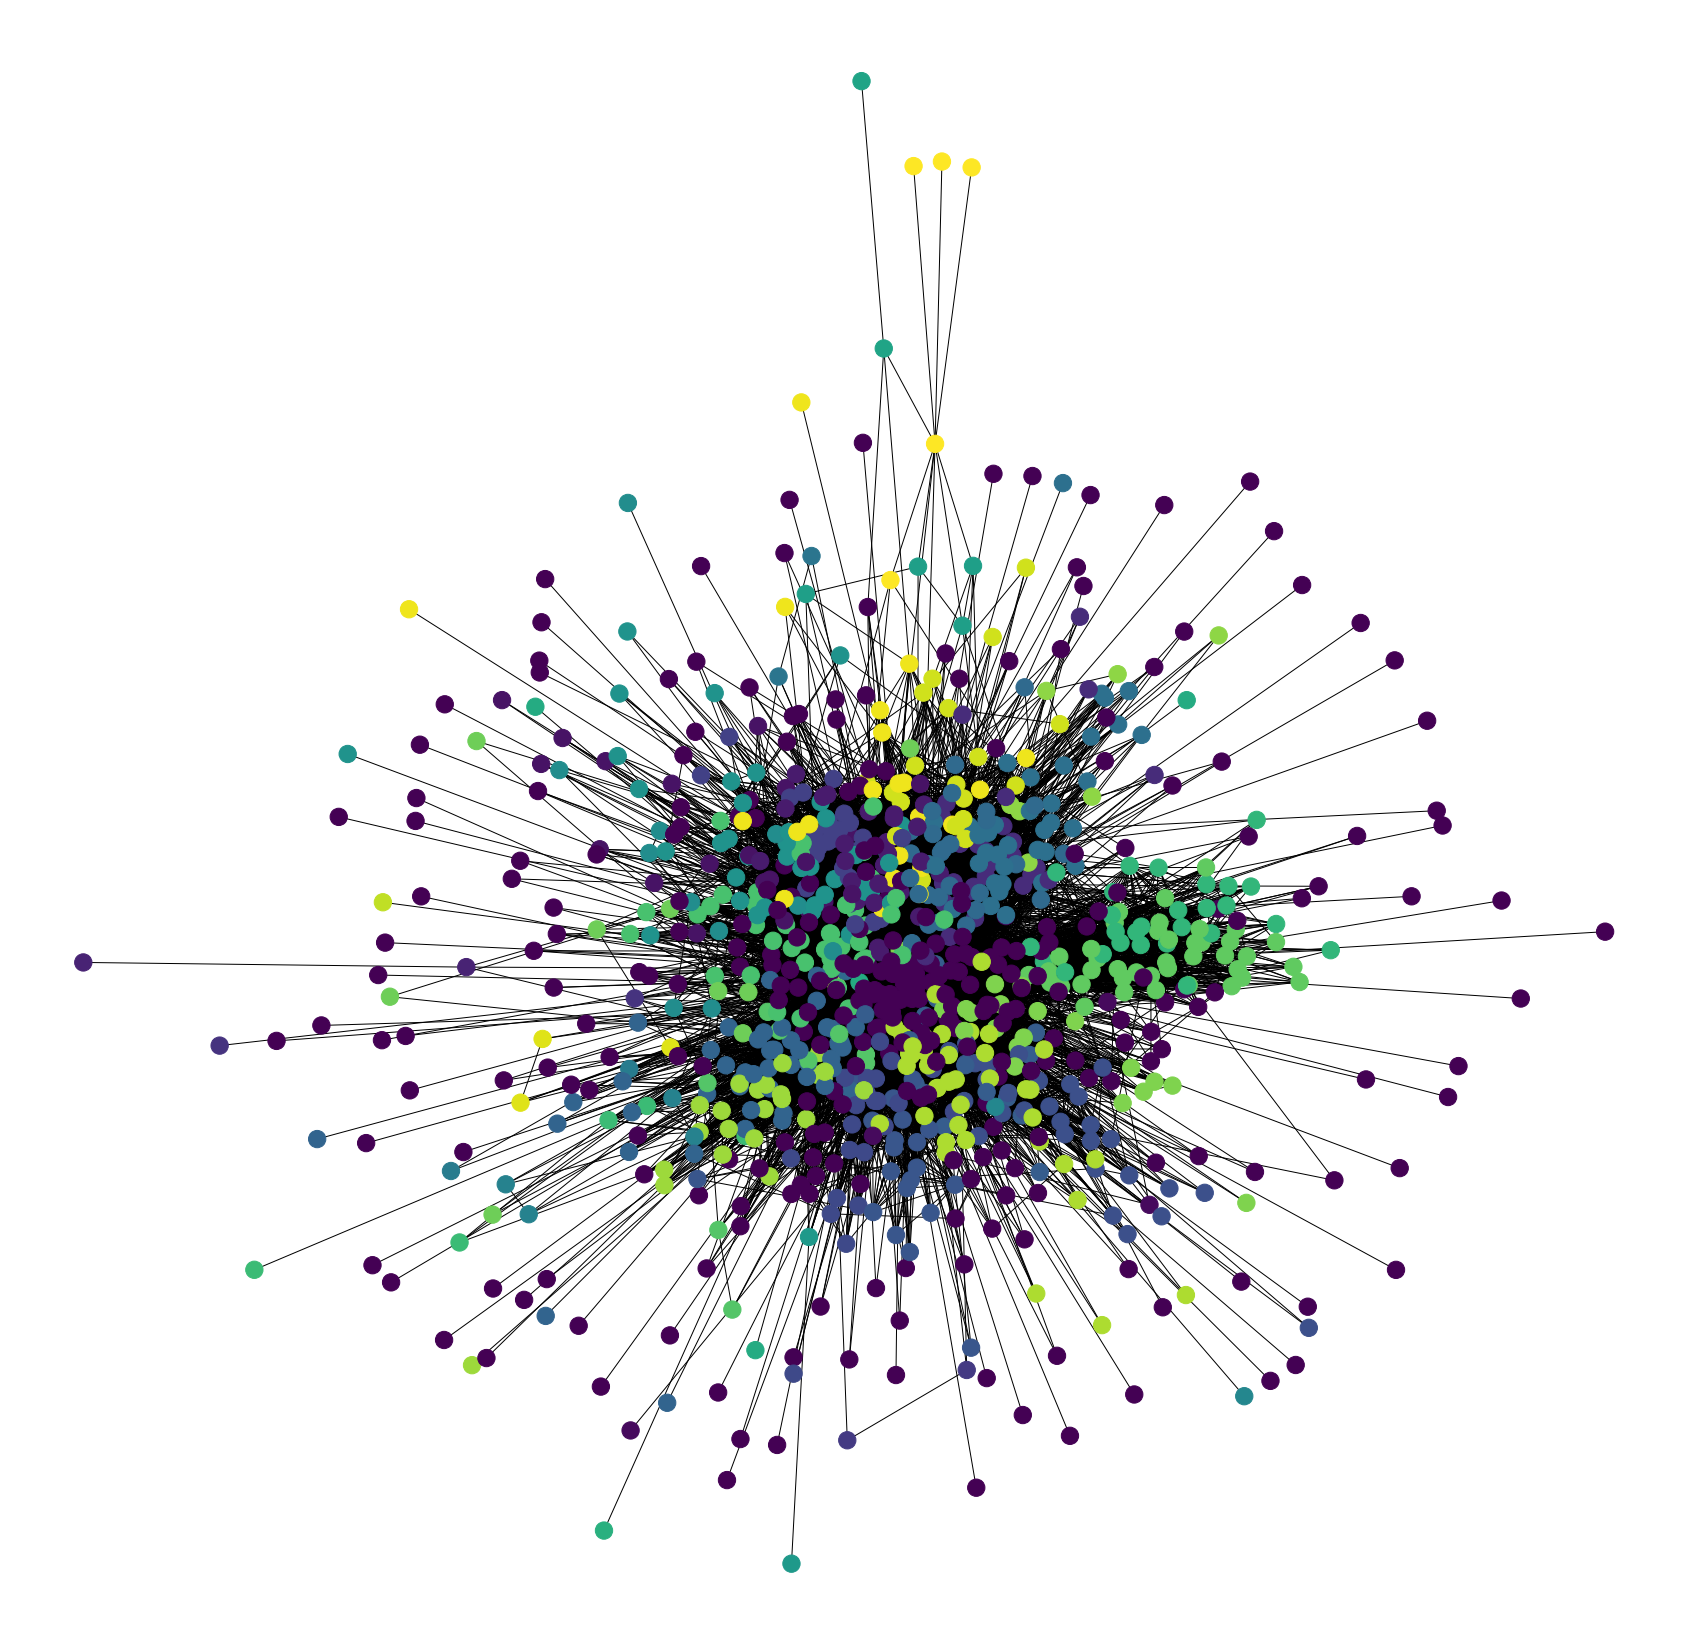

In [32]:
df_vect, predict = clustering_spectral ( G0_Email, 42) 
fig, ax = plt.subplots(figsize=(30, 30))
nx.draw(G0_Email, node_color=predict, )

The normalised algorithm perform better with E-mail network. 

## 1.3 -  Girvan Newman algorithm 

Now that community detection have been introduced by spectral clustering, we introduce the concept of modularity. Girvan and Newman 2004 [[21](http://www.cse.cuhk.edu.hk/~cslui/CMSC5734/newman_community_struct_networks_phys_rev.pdf )] are the first who introduced modularity with Girvan-Newman algorithm.

This algorithm is based on a divisive method. They first look for the edges in the network that are most "between" to other vertices. The  betweenness is a measure that favors edges that lie between communities and disfavors those that lie inside communities. There are many methods to calculte this measure like shortest paths, random walk betweeness, or current-flow betweenness, but we focus on the shortest path betweenness. It is defined as the number of shortest paths in the graph that passes through the node or edge divided by the total number of shortest paths.

For the detection and analysis of community structures, the Girvan-Newman algorithm relies on the iterative elimination of edges that have the highest betweeness. By removing edges from the graph one-by-one, the network breaks down into smaller pieces, so-called communities. Note that, in this methods, they include a " recalculation step" : recalculate betweenness measure after the removal of each edge.

Thus, the general form of their community structure finding algorithm is as follows:
- 1. Calculate betweenness scores for all edges in the network.
- 2. Find the edge with the highest score and remove it from the network.
- 3. Recalculate betweenness for all remaining edges.
- 4. Repeat from step 2

Then, the new problem is : When can we stop the algorithm ? or equivalently How do we know when the communities found by the algorithm are good ones? 
To answer these questions, Girvan and Newman define a measure of
the quality of a particular division of a network : the modularity.

Consider a particular division of a network into k communities. Let us define a $k \times k$ symmetric matrix $e$ whose element $e_{ij}$ is the fraction of all edges in the network that link vertices in community i to vertices in community j.
The trace of this matrix $Tr e = \sum_i e_{ii} $ gives the fraction of edges in the network that connect vertices in the same community, and clearly a good division into communities should have a high value of this trace. The trace on its own, however, is not a good indicator of the quality of the division since, for example, placing all vertices in a single community would give the maximal value of $Tr e = 1$ while giving no information about community structure at all.
So we further define the row (or column) sums $a_i = \sum_j e_{ij} $, which represent the fraction of edges that connect to vertices in community i. In a network in which edges fall between vertices without regard for the communities they belong to, we would have $e_{ij} = a_ia_j $. Thus we can define a
modularity measure by
$$
Q = \sum_i (e_{ii} - a_i^2) = Tr e - ||e^2||
$$

In [33]:
def biggest_betweenness_centrality (g):
    '''
    Compute the betweenness scores
    Args : 
        - g : a graph
    '''
    betweeness = nx.edge_betweenness_centrality(g)
    betweeness_sorted = sorted(betweeness.items(), key=lambda t: t[1], reverse = True)
    return betweeness_sorted[0][0]

def modularity(new_G, original_G) :
    '''
    This fonction compute the modularity of the graph.
    Args : 
        - new_G : decomposed graph 
        - original_G : original graph
    '''
    m = nx.number_of_edges(original_G)
    A_new = nx.adj_matrix(new_G)
    new_degrees = dict(new_G.degree())
    original_degrees = dict(original_G.degree())
    print('Number of connected components: {}'.format(nx.number_connected_components(new_G)))
    co_comp = nx.connected_components(new_G)
    Q = 0 
    for component in co_comp : 
        e_ii = 0
        a_i = 0
        for node in component :
            e_ii += new_degrees[node]
            a_i += original_degrees[node]
        Q += (float(e_ii)/(2*m) - float(a_i*a_i)/(4*m*m) )
    print('     Modularity of this decomposed graph G: {}'.format(Q))
    return Q

def Girvan_Newman (g, n=2 ):
    '''
    Compute the Girvan Newman algorithm 
    
    Args :
        g : graph 
        n : number of clusters
    '''
    
    new_G = g.copy()
    connected_components = list(nx.connected_components(new_G))
    number_of_connected_components = nx.number_connected_components(new_G)
    modularities = {1 : modularity (new_G, g) }
    
    while number_of_connected_components != n : 
        u,v = biggest_betweenness_centrality(new_G)
        new_G.remove_edge(u,v)
        if  nx.number_connected_components(new_G) > number_of_connected_components :
            number_of_connected_components = nx.number_connected_components(new_G)
            modularities[number_of_connected_components] = modularity (new_G, g)
    return new_G, modularities



In [34]:
G_Karate = nx.karate_club_graph()

In [35]:
G, modularities = Girvan_Newman(G_Karate, n=34)

Number of connected components: 1
     Modularity of this decomposed graph G: 0.0
Number of connected components: 2
     Modularity of this decomposed graph G: 0.34714003944773175
Number of connected components: 3
     Modularity of this decomposed graph G: 0.3231426692965155
Number of connected components: 4
     Modularity of this decomposed graph G: 0.33760683760683763
Number of connected components: 5
     Modularity of this decomposed graph G: 0.40129848783694944
Number of connected components: 6
     Modularity of this decomposed graph G: 0.3925049309664695
Number of connected components: 7
     Modularity of this decomposed graph G: 0.37623274161735704
Number of connected components: 8
     Modularity of this decomposed graph G: 0.3583168967784353
Number of connected components: 9
     Modularity of this decomposed graph G: 0.341715976331361
Number of connected components: 10
     Modularity of this decomposed graph G: 0.3247863247863249
Number of connected components: 11
     M

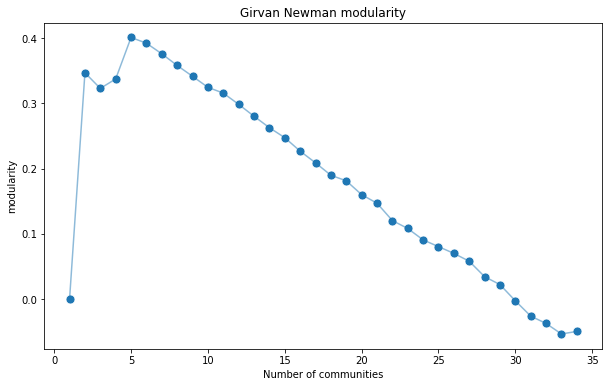

In [36]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=modularities.keys(), y = modularities.values(), s=80, ax=ax)
sns.lineplot(x=modularities.keys(), y = modularities.values(), alpha=0.5, ax=ax)
ax.set(title='Girvan Newman modularity', ylabel='modularity', xlabel='Number of communities');

The modularity increases a lot for 2 communities (0.38) , then decreases and reaches its maximum for k = 5 ( modularity = 0,4 )

In [37]:
G_2, modularities = Girvan_Newman(G_Karate, n=2)

Number of connected components: 1
     Modularity of this decomposed graph G: 0.0
Number of connected components: 2
     Modularity of this decomposed graph G: 0.34714003944773175


In [38]:
def prediction (g) :
    predict = [0 for i in range(g.number_of_nodes())]
    l = {}
    for i in range(nx.number_connected_components(g)) :
        l[i]=list(nx.connected_components(g))[i]
        for element in l[i] :
            predict[element]= i
    return predict

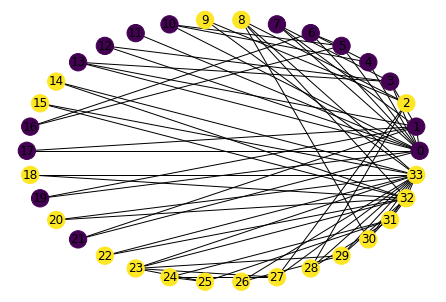

In [39]:
nx.draw_circular(G_2, node_color=prediction(G_2), with_labels = True)

In [40]:
G_5, modularities = Girvan_Newman(G_Karate, n=5)

Number of connected components: 1
     Modularity of this decomposed graph G: 0.0
Number of connected components: 2
     Modularity of this decomposed graph G: 0.34714003944773175
Number of connected components: 3
     Modularity of this decomposed graph G: 0.3231426692965155
Number of connected components: 4
     Modularity of this decomposed graph G: 0.33760683760683763
Number of connected components: 5
     Modularity of this decomposed graph G: 0.40129848783694944


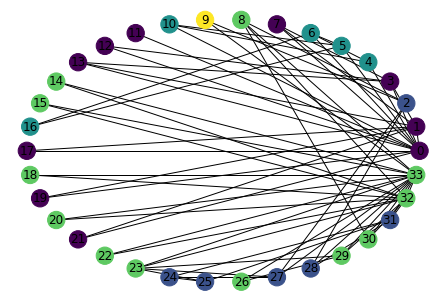

In [41]:
nx.draw_circular(G_2, node_color=prediction(G_5), with_labels = True)

In [42]:
groupeA = list(nx.connected_components(G_2))[0]
groupeB = list(nx.connected_components(G_2))[1]

In [43]:
club_num, d = attribution_Hi_Officer(groupeA, groupeB)

{0: 'Mr. Hi', 1: 'Officer'}
 Group  {0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21} is probably Mr Hi's one, whereas  {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33} is probably Officer's group


In [44]:
predict = []
for i in range (nx.number_of_nodes(G_2)) : 
    if i in groupeA : 
        predict.append(0)
    else :
        predict.append(1)

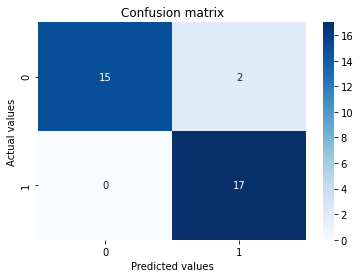

In [45]:
plot_confusion_matrix(club_num,predict)

Two persons are misclassified

In [175]:
G0_Email_42, modularities = Girvan_Newman(G0_Email, n=42)

Number of connected components: 1
     Modularity of this decomposed graph G: 0.0
Number of connected components: 2
     Modularity of this decomposed graph G: 0.0007182535921864755
Number of connected components: 3
     Modularity of this decomposed graph G: 0.000718212293017873
Number of connected components: 4
     Modularity of this decomposed graph G: 0.0007181691982332812
Number of connected components: 5
     Modularity of this decomposed graph G: 0.0007181243078325892
Number of connected components: 6
     Modularity of this decomposed graph G: 0.0008378272544770031
Number of connected components: 7
     Modularity of this decomposed graph G: 0.0008377751816123542
Number of connected components: 8
     Modularity of this decomposed graph G: 0.000837721313131494
Number of connected components: 9
     Modularity of this decomposed graph G: 0.0008376656490347555
Number of connected components: 10
     Modularity of this decomposed graph G: 0.0008376081893220279
Number of connected

# 2 - Bayesian modularity

## 2.1 - Priors of the model

In this section, we assume $K$ to be known and we consider priors on the parameters of the Stochastic Block Model.

The priors on $\pi$ - the probabilities associated to each communities - and every element in the matrix $P$ - the probabilities of having an edge between communities - are considered to be independent.

$$ \pi \sim \mathcal{Dirichlet}(\alpha, ..., \alpha) \qquad \text{with} \quad \alpha > 0 $$

$$ P_{ab} \sim \mathcal{Beta}(\beta_1, \beta_2) \qquad \text{for} \quad 1 \leq a \leq b \leq K \qquad \text{with} \quad \beta_1, \beta_2 > 0 $$

The Bayesian model is completed with priors on the labellings, denoted by $e = (e_1, ..., e_n)$, and edges, denoted by $A$ the adjacency matrix:

$$ e_i | \pi, P  \overset{iid}{\sim} \pi \qquad \text{for} \quad 1 \leq i \leq n$$

$$ A_{ij} | \pi, P, e \overset{id}{\sim} \mathcal{Bernoulli}(P_{e_i, e_j}) \quad 1 \leq i < j \leq n $$

We introduce the following numbers, the number of nodes in a community, the number of edges between two communities and the maximum number of possible edges between two communities :

$$ n_a(e) = \sum_{i=1}^n \mathbb{1}(e_i=a) $$

$$ O_{ab}(e) = \sum_{i,j} A_{ij} \mathbb{1}(e_i=a, e_j=b) \quad \text{if} \; a \neq b \qquad  O_{ab}(e) = \sum_{i<j} A_{ij} \mathbb{1}(e_i=a, e_j=b) \quad \text{if} \; a = b $$

$$ n_{ab}(e) = n_a(e)n_b(e) \quad \text{if} \; a \neq b \qquad  n_{ab}(e) = \frac{n_a(e)(1-n_a(e))}{2} \quad \text{if} \; a = b $$

Now that the model and priors are specified, we can present the Bayesian modularity.

## 2.2 - Introducing Bayesian modularity

The Bayesian estimator in the case of community detection consists of maximising the likelihood of the posterior distribution of the labelling:
$$ \hat{e} = argmax_e p(e|A) $$

This posterior mode is obtained by marginalising the likelihood of the model: $ L(e, A, P, \pi) = \prod_{a\leq b} P_{ab}^{O_{ab}(e)} (1-P_{ab})^{n_{ab}(e) - O_{ab}(e)} \prod_a \pi_a^{n_a(e)} $


Collapsing can be used to give a more convenient and efficient expression for the model. This refers to the integration of nuisance parameters from the model. The SBM has been partially collapsed by Kemp et al. (2004)[https://dspace.mit.edu/bitstream/handle/1721.1/30489/MIT-CSAIL-TR-2004-050.pdf?sequence=2&isAllowed=y] , but we will consider the full collapsing of both $P$ and $\pi $. As our primary interest is in the clustering $e$, we integrate out $P$ and $\pi$, yielding an explicit expression for the marginal $P(A_{ij}, e, K)$. We emphasize that integration does not change the model, it merely yields a more convenient representation of the relevant parts of the posterior. This integration is made possible by the choice of conjugate priors for $P$  and $\pi$.


By integrating the likelihood with regards to $(\pi, P)$ independent from one another, we have :

$ \int_{[0,1]^{K(K+1)/2}} \int_{S_K} L(e, A, P, \pi) f_P(P) f_\pi(\pi) d\pi dP = \left[ \prod_{a\leq b} \int_0^1 P_{ab}^{O_{ab}(e) + \beta_1 -1} (1-P_{ab})^{n_{ab}(e) - O_{ab}(e) + \beta_2 - 1} \frac{1}{\mathcal{B}(\beta_1, \beta_2)} dP_{ab} \right] \left[ \prod_a \pi_a^{n_a(e) + \alpha - 1} \frac{1}{\mathcal{D}(\alpha)} \right] $

$\qquad = \left[ \prod_{a\leq b} \frac{\mathcal{B}(\beta_1 + O_{ab}(e), \beta_2 + n_{ab}(e) - O_{ab}(e))}{\mathcal{B}(\beta_1, \beta_2)} \right] \left[ \frac{\mathcal{D}((\alpha + n_a(e))_a)}{\mathcal{D}(\alpha)} \right] $

$\qquad = \underbrace{ \left[ \prod_{a\leq b} \frac{\mathcal{B}(\beta_1 + O_{ab}(e), \beta_2 + n_{ab}(e) - O_{ab}(e))}{\mathcal{B}(\beta_1, \beta_2)} \right]}_{(1)} \underbrace{ \left[ \frac{\Gamma(\alpha K)}{\Gamma(\alpha)^K \Gamma(n+\alpha K)} \prod_a \Gamma(n_a(e) + \alpha) \right]}_{(2)} $

Because the two priors are conjugate, we obtain a closed form for this marginalised density. We observe that $(1)$ depends on both $A$ and $e$, whereas $(2)$ only depends on $e$.

We can now introduce the Bayesian modularity by taking the $log$ of that joint density, multiplying it with $n^{-2}$ and omitting the part that does not depend on e:
$$ Q_B(e) = \frac{1}{n^2} \sum_{1\leq a \leq b \leq K} log(\mathcal{B}(\beta_1 + O_{ab}(e), \beta_2 + n_{ab}(e) - O_{ab}(e))) + \frac{1}{n^2} \sum_{a=1}^K log(\Gamma(n_a(e) + \alpha)) $$

This function can be seen as a modularity as it depends on the number of edges drawn ($O_{ab}(e)$) and the maximum number of edges that could be drawn ($n_{ab}(e)$) between different labellings, thus measuring the strength of division of a network into modules. 

Now, because $p(e|A) = \frac{p(A, e)}{p(A)}$, maximising $p(A,e)$ is equivalent to maximising $p(e|A)$. Thus, because $Q_B$ is a monotonically increasing transform of $p(A,e)$, we can write the maximisation problem as:
$$ \hat{e} = argmax_e Q_B(e) $$

We will now apply this MAP estimation to a toy example : the Karate Club network. This example has also been treated in the article and we wish to reproduce its main findings.

In [1]:
## import packages

import networkx as nx
import numpy as np 
import pandas as pd
from math import gamma
import scipy
import itertools

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

%matplotlib inline

In this first chunk of code, we compute the elements useful to compute the Bayesian modularity.

In [2]:
## Here G, the graph is defined outside of the functions, could be changed.

def O(e,a,b):
    '''
    This function computes the number of edges between nodes labelled as a and b.
    Args:
        e: current labelling (list format)
        a, b: labels to count edges between (1 <= a,b <=nb_labels)
    '''
    N=len(e)
    if a==b:
        return(sum([((i,j) in G.edges())*(e[i]==a)*(e[j]==b) for i in range(N) for j in range(i+1,N) ]))
    else:
        return(sum([((i,j) in G.edges())*(e[i]==a)*(e[j]==b) for i in range(N) for j in range(N) ]))

def n(e, a, b=None):
    '''
    This function computes the maximum number of edges that could be drawn between nodes labelled as a and b.
    If b is None, it simply the computes the number of nodes labelled a.
    Args:
        e: current labelling (list format)
        a, b: labels to count edges between (1 <= a,b <=nb_labels)
    '''
    if b is None:
        return(sum([e_i==a for e_i in e]))
    elif a==b:
        return(0.5*n(e,a)*(n(e,a)-1))
    else:
        return(n(e,a)*n(e,b))

def Q_B(e, K, alpha, beta_1, beta_2):
    '''
    This function computes the Bayesian modularity of a given labelling for the setup previously discribed.
    Args:
        e: current labelling (list format)
        K: the number of communities assumed to be in the graph
        alpha: Dirichlet parameter of the prior on pi, the probabilities associated with each community
        beta_1, beta_2: Beta parameters of the prior on P, the probabilities of forming edges between communities
    '''
    N=len(e)
    res_1=0
    res_2=0
    for a in range(1,K+1):
        res_2+=np.log(gamma(n(e,a)+alpha))
        for b in range(a,K+1):
            res_1+=np.log(scipy.special.beta(O(e,a,b) + beta_1, n(e,a,b) - O(e,a,b) + beta_2))
    return (res_1 + res_2)/(N**2)


In the article, the maximisation of the bayesian modularity - a non-convex function - on the set of possible node labellings with exactly K classes - a non convex set - was led by the Tabu Search meta-heuristic.

This algorithm explores the space from near to far while keeping track of the solutions it has already explored. One of its particularities is this aspect of a memory and of "tabu" solutions that enables the algorithm to explore the space and even force it to explore a priori less promising regions. It can thus escape local minima thanks to that mechanism. It is however very computationally expensive and other moethods are available for larger datasets.

The following algorithm implements the Tabu Search method. As it was done in the original article, we will use that heuristic to explore the space of solutions and return the optimal solution with regards to the Bayesian modularity.

In [3]:
def Tabu_search(initial_sol, objective, get_neighbours, max_iter, max_mem_size, verbose=0):
    '''
    This function performs a Tabu search, metaheuritic method using local search methods to optimise a given 
    function.
    Args:
        initial_sol: the initialisation of the algorithm, it will start by exploring its neighbourhood
        objective: the function the algorithm wishes to maximise
        get_neighbours: a function that returns the neighbourhood of the parameter we wish to maximise over
        max_iter: stopping criteria for the maximum number of iterations the tabu search goes through
        max_mem_size: the maximum length of the Tabu list that stores the position explored in the past
        verbose: if 0 at each 10 iterations and at the beginning and end the current classification is print
                 if 1 we only print the first and last graphs and we print the modularity updates
                 if 2 nothing is printed during the running
    '''
    K=len(set(initial_sol))
    best_sol = initial_sol
    best_obj = objective(best_sol,K)
    best_new_sol = initial_sol
    set_new_sol = get_neighbours(best_new_sol)
    tabu_list = [initial_sol]
    last_best_obj = 0
    i=0
    if verbose!=2:
        print("Initial graph")
        nx.draw_circular(G, node_color=best_sol, with_labels=True)
        plt.show()
    while (i < max_iter) and (len(set_new_sol)>0):
        i+=1
        # keep only the neighbours that are not in the Tabu list
        set_new_sol_tabu = list(filter(lambda x: x not in tabu_list, set_new_sol))
        # update the best solution with the neighbouring point that maximises the objective
        best_new_sol = sorted(set_new_sol_tabu, key=lambda x: -objective(x,K))[0] if len(set_new_sol_tabu)>0 else set_new_sol[0]
        # update the solution if the new found solution achieves a greater objective value
        best_sol = best_new_sol if objective(best_new_sol,K)>objective(best_sol,K) else best_sol
        best_obj=objective(best_sol,K)
        # add the new found best solution to the Tabu list
        tabu_list.append(best_new_sol)
        # delete the first element in the Tabu list if max memory size is reached
        if len(tabu_list)>max_mem_size:
            tabu_list=tabu_list[1:]
        if i%10==0:
            if verbose!=2:
                print("After {0} iterations, the Bayesian modularity is {1}".format(i, best_obj))
            if verbose==0:
                nx.draw_circular(G, node_color=best_sol, with_labels=True)
                plt.show()
            if last_best_obj==best_obj:
                # If the labelling has not changed during 10 iterations, the search stops
                if verbose!=2:
                    print("The modularity has not changed in the last 10 iterations, the algorithm is coming to an end.")
                break
            last_best_obj = best_obj
        # get the neighbours of the current best solution
        set_new_sol = get_neighbours(best_new_sol)
    if verbose!=2:
        print("Final graph")
        nx.draw_circular(G, node_color=best_sol, with_labels=True)
        plt.show()
    return(best_sol, objective(best_sol, K))

In order to use the Tabu Search algorithm we need to define the neighbourhood of a specific labelling in the space of possible labellings. As it was not specified in the article we had to choose a way to define that notion to our Tabu Search. This might impact our ability to find the actual optimum as it affects the way the algorithm goes through the space of solutions. 

We decided to define the neighbourhood of a labelling for a given graph as the labellings resulting from a vertex move of the original labelling. Note that the labellings resulting from a vertex move are then filtered to remain in the space of solutions, i.e. labellings containing K distinct classes. A vertex move of an edge in a graph corresponds to a change of its label into the label of its adjacent edges. Thus, the neighbourhood we define is a set containing labellings identical to the one considered except for one edge whose label has changed. To speed up the search process we do not consider the vertex moves of every edge of the graph but only 50% of them.

In [4]:
def VM_neighbourhood(labelling, level = 0.5):
    '''
    This function returns the neighbourhood of a labelling considering the vertex mover operator
    Args:
        labelling: the current labelling
        level: the proportion of nodes we consider changing the label of
    '''
    K=len(set(labelling))
    n_changes = round(level*len(labelling))
    changed_samples = list(np.random.randint(0, len(labelling), n_changes))
    neighbours = []
    for node in changed_samples:
        # for a given node, we will change its labels based on the labels of its adjacent nodes
        changed_labels = set([labelling[a] for a in range(len(labelling))  if ((node,a) in G.edges()) or ((a,node) in G.edges())])
        if labelling[node] in changed_labels: changed_labels.remove(labelling[node])
        for lab in changed_labels:
            # for each new label considered, we consider the vertex move as a neighbour of labelling
            new_labelling = labelling.copy()
            new_labelling[node]=lab
            if len(set(new_labelling))==K:
                # Ensure that the number of classes remains the same after the vertex move
                neighbours+=[new_labelling]
    return(neighbours)

def Q_B_objective(labelling,K):
    return(Q_B(labelling,K, alpha=0.5, beta_1=0.5, beta_2=0.5))

We will first work on the karate club graph, the same one considered in the article.

A representation of the graph and of the club seperation groups is available below.

Number of nodes 34
Number of edges 78


C:\Users\clair\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


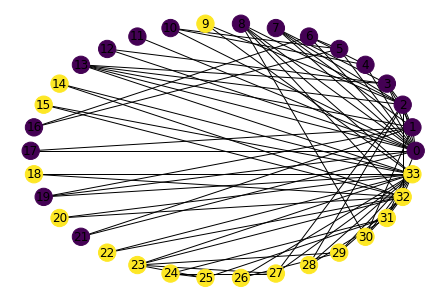

In [5]:
## We first consider the karate club network

# load the graph
G = nx.karate_club_graph()

print("Number of nodes", len(G.nodes()))
print("Number of edges",len(G.edges()))

# visualize the graph
club_labels = nx.get_node_attributes(G,'club')
club_labels = [1*(club=='Officer') for (key, club) in club_labels.items()]

nx.draw_circular(G, node_color=club_labels, with_labels = True)

We first hope to be able to reproduce the results from the article. To do so we run the Tabu Search on a specific initial labelling.

We will see that the algorithm is sensitive to the initialisation and we will run our Bayesian modularity maximisation algorithm on two different initial labellings to illustrate that.

Initial graph


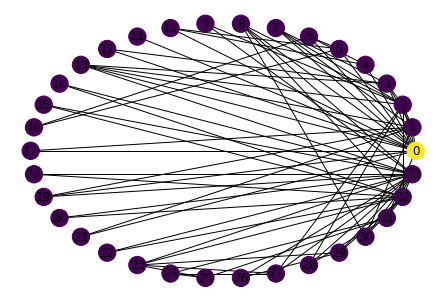

After 10 iterations, the Bayesian modularity is -0.09894255526216293
After 20 iterations, the Bayesian modularity is -0.0949633139197276
After 30 iterations, the Bayesian modularity is -0.0949633139197276
The modularity has not changed in the last 10 iterations, the algorithm is coming to an end.
Final graph


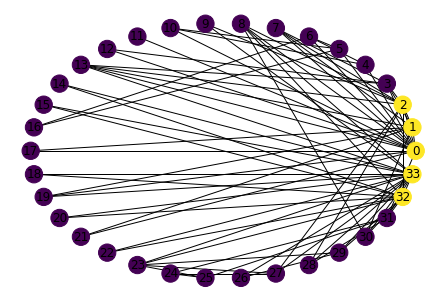

In [7]:
# First run with a specific initialisation
e=[1]*len(G.nodes())
e[0]=2 # we single out Mr. Hi
test_search, _ = Tabu_search(e, Q_B_objective, VM_neighbourhood, 100, 5, verbose=1)

# We quickly observe the result obtained in the paper, the final modularity is -0.09496

Initial graph


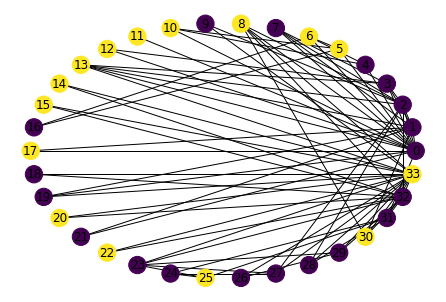

After 10 iterations, the Bayesian modularity is -0.1293365289771307
After 20 iterations, the Bayesian modularity is -0.12006398770475013
After 30 iterations, the Bayesian modularity is -0.10783304648464584
After 40 iterations, the Bayesian modularity is -0.10783304648464584
The modularity has not changed in the last 10 iterations, the algorithm is coming to an end.
Final graph


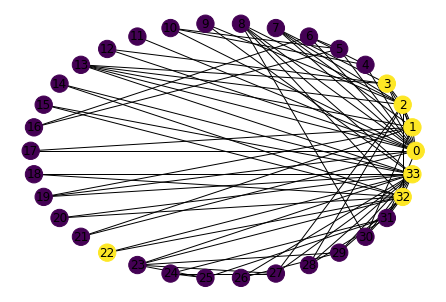

In [8]:
## Second run with a different initialisation

e = list(np.random.randint(1,3,34))
test_search, _ = Tabu_search(e, Q_B_objective, VM_neighbourhood, 100, 5, verbose=1)

As mentionned in the article, we observe that the solution found by the algorithm depends on the initial labelling we start out with.

To solve this issue, according to the article, we decided to launch multiple Tabu Search, each with a different initial labbeling and to only keep the result of the best performing one with regards to the Bayesian modularity.

In [156]:
def launch_TabuSearch(nb_runs, graph, nb_communities, max_iter=100, objective = Q_B_objective, modularity_name="bayesian", verbose=0):
    '''
    This function runs the Tabu Search on multiple initialisations and returns the best solution
    Args:
        nb_runs: the number of initialisations to consider
        graph: the graph studied
        nb_communities: the number of communities assumed to be in the graph
    '''
    G=graph
    nb_nodes=len(G.nodes())
    solutions=[]
    modularities=[]
    # we draw a sample of nb_runs community probabilities, one for each initialisation
    PIs = np.random.dirichlet([0.5]*nb_communities, size = nb_runs)
    for i in range(nb_runs):
        # we draw a sample of community assignments based on the probabilities
        e=list(np.apply_along_axis(lambda x: np.argmax(x)+1, 1, np.random.multinomial(1, PIs[i], nb_nodes)))
        # we ensure that every community appears at least once in the sample
        while len(set(e))<nb_communities:
            missing=list(set(range(1, nb_communities+1)) - set(e))
            shuffle_id = np.arange(nb_nodes)
            np.random.shuffle(shuffle_id)
            new_assignment=shuffle_id[:len(missing)*round(nb_nodes*0.1)]
            missing = [m for m in missing for _ in range(3)]
            for m, p in zip(missing, new_assignment):
                e[p]=m
        if verbose==0:
            print("-------------------------------------------------------")
            print("Initialisation number {} - Running the TabuSearch".format(i+1))
        new_sol, mod_new_sol = Tabu_search(e, objective, VM_neighbourhood, max_iter, 5, verbose=2)
        solutions.append(new_sol)
        modularities.append(mod_new_sol)
        if verbose==0:
            print("End of the Tabu Search - The {} modularity for this run was {}".format(modularity_name, mod_new_sol))
    return solutions[modularities.index(max(modularities))]

-------------------------------------------------------
Initialisation number 1 - Running the TabuSearch
End of the Tabu Search - The bayesian modularity for this run was -0.09686221758131672
-------------------------------------------------------
Initialisation number 2 - Running the TabuSearch
End of the Tabu Search - The bayesian modularity for this run was -0.10783304648464584
-------------------------------------------------------
Initialisation number 3 - Running the TabuSearch
End of the Tabu Search - The bayesian modularity for this run was -0.1059062049385278
-------------------------------------------------------
Initialisation number 4 - Running the TabuSearch
End of the Tabu Search - The bayesian modularity for this run was -0.0949633139197276
-------------------------------------------------------
Initialisation number 5 - Running the TabuSearch
End of the Tabu Search - The bayesian modularity for this run was -0.0949633139197276
-------------------------------------------

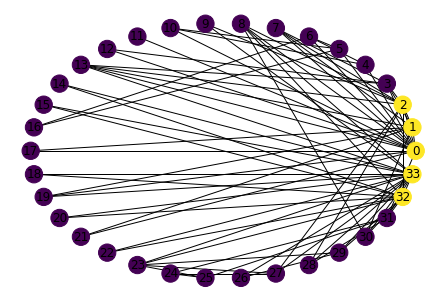

In [10]:
# Running multiple Tabu Search with different initialisations
test_search = launch_TabuSearch(30, G, 2)
nx.draw_circular(G, node_color=test_search, with_labels = True)

After this step, we recover the exact solution obtained in the article.

This solution is very different from the classification obtained if we look at the separation of the club between Mr. Hi and the Officer. We can check that the modularity of that classification is not higher than our solution.

In [11]:
print("Modularity of the paper: ", Q_B_objective(test_search, 2))
print("Modularity of the club seperation: ", Q_B_objective([c+1 for c in club_labels], 2))

Modularity of the paper:  -0.0949633139197276
Modularity of the club seperation:  -0.12053195990067415


The club separation is not optimal with regards to the Bayesian modularity maximisation. However, this particular classification is the one returned by most algorithms. The Bayesian modularity thus capture a different aspect of communities in graphs from usual algorithms. Here it grouped the nodes with the highest degrees corresponding to the clubs leaders and their closest supporters.

We will now see the effect of increasing the number of communities considered.

-------------------------------------------------------
Initialisation number 1 - Running the TabuSearch
End of the Tabu Search - The bayesian modularity for this run was -0.08417057409406425
-------------------------------------------------------
Initialisation number 2 - Running the TabuSearch
End of the Tabu Search - The bayesian modularity for this run was -0.10154462495247313
-------------------------------------------------------
Initialisation number 3 - Running the TabuSearch
End of the Tabu Search - The bayesian modularity for this run was -0.10820523702896359
-------------------------------------------------------
Initialisation number 4 - Running the TabuSearch
End of the Tabu Search - The bayesian modularity for this run was -0.10038584230906265
-------------------------------------------------------
Initialisation number 5 - Running the TabuSearch
End of the Tabu Search - The bayesian modularity for this run was -0.08523343559606239
----------------------------------------

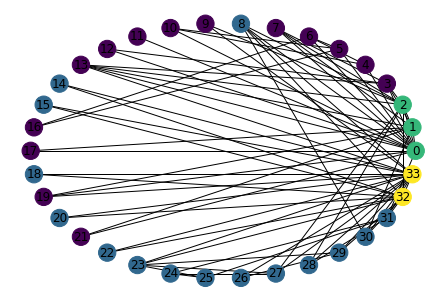

In [11]:
test_search = launch_TabuSearch(30, G, 4)
nx.draw_circular(G, node_color=test_search, with_labels = True)

We obtain a slightly different result than the one presented in the paper. It is however mentionned by the author that, due to the heuristic nature of the Tabu Search, the solution presented in the paper might not even be the optimal solution with regards to maximising the Bayesian modularity.

With this choice of K=4 communities, we almost recover the club seperation classification, isolating the leaders and their close supporters, except for the fact that nodes 8 and 9 are misclassified.

To make sure that the misclassification of nodes 8 and 9 is not due to the Tabu Search limits, we check that this configuartion does in fact achieve a higher Bayesian modularity.

In [12]:
best_labels = club_labels.copy()
best_labels[0]=2
best_labels[1]=2
best_labels[2]=2
best_labels[33]=3
best_labels[32]=3
best_labels=[k+1 for k in best_labels]
print("Modularity of the club separation: ", Q_B_objective(best_labels, K=4))
print("Modularity of the first run: ", Q_B_objective(test_search, K=4))

Modularity of the club separation:  -0.08512133688159071
Modularity of the first run:  -0.08109027677306468


Misclassifying the nodes 8 and 9 does in fact improve the Bayesian modularity, the result is not due to an under-explored region of the solution space by the Tabu Search.

We have seen in this part that bayesian modularity, while not agreeing with more classical community detection approaches, does provide an insight on the network architecture. Rather than expressing the social sense of communities, it focuses more on the similarities between the way nodes form connections with others. Overall, there is no strong reason to believe that the two Karate clubs do in fact constitute communities in the stochastic senss.

Moreover, the result for four communities enables us to almost recover the club seperation while still setting apart the club leaders from their followers. This point of view provides a great insight in the hierarchy taking place in the network and the Bayesian modularity is for that more informative than usal approaches.

Other modularity approaches have been thought of, we will present in the next section one of them.

## 2.3 - A comparison with Likelihood modularity

In this section, we compare the Bayesian modularity with the Likelihood modularity.

This criterion was obtained by Bickel and Chen (2009) and resulted from only considering the logarithm of the part of the Likelihood that depended on $A$, i.e. the first product in the Likelihood, and replacing the probabilities $P_{ab}$ by their maximum likelihood estimators : $\hat{P}_{ab} = \frac{O_{ab}(e)}{n_{ab}(e)}$. Which gives :

$ \qquad Q_{ML}(e) = \frac{1}{n^2} log(\prod_{a\leq b} \hat{P}_{ab}^{O_{ab}(e)} (1 - \hat{P}_{ab})^{n_{ab}(e) - O_{ab}(e)}) \\ 
\qquad \qquad \; \; \; = \frac{1}{n^2} \sum_{a\leq b} O_{ab}(e) log(\hat{P}_{ab}) + (n_{ab}(e) - O_{ab}(e)) log(1 - \hat{P}_{ab}) \\
\qquad \qquad \; \; \; = \frac{1}{n^2} \sum_{a\leq b} n_{ab}(e) \left[ \frac{O_{ab}(e)}{n_{ab}(e)} log(\frac{O_{ab}(e)}{n_{ab}(e)}) + (1 - \frac{O_{ab}(e)}{n_{ab}(e)}) log(1 - \frac{O_{ab}(e)}{n_{ab}(e)}) \right] \\
\qquad \qquad \; \; \; = \frac{1}{n^2} \sum_{a\leq b} n_{ab}(e) \tau(\frac{O_{ab}(e)}{n_{ab}(e)})$

Where $\tau(x) = xlog(x) + (1-x) log(1_x)$.

This criterion is very similar to the first term of the Bayesian modularity where instead of integrating those parameters $P_{ab}$ , we replace them with the most likely values with regards to the graph structure and the current labelling.

The following lemma provides a numerical comparison between the two modularities.

---

**Lemma 2.1** : There exists a constant $C$ such that, for $\mathcal{E} = \{1, ..., K\}^n$ the set of all possible labellings

$$ max_{e\in\mathcal{E}} |Q_B(e) - Q_{ML}(e) - Q_P(e)| \leq \frac{C log n}{n^2} \qquad \text{for} \qquad Q_P(e) = \frac{1}{n^2} \sum_{a : n_a + \lfloor \alpha \rfloor \geq 2} n_a(e) log(n_a(e)) - \frac{1}{n} $$

As a result we have $ max_{e\in\mathcal{E}} |Q_B(e) - Q_{ML}(e)| = \mathcal{O}(\frac{log n}{n}) $.

---

We implemented the Likelihood modularity optimisation on the same example of the Karate Club network to compare its results with the Bayesian modularity approach.

In [161]:
def tau(x):
    if x>0 and x<1:
        res = x*np.log(x) + (1-x)*np.log(1-x)
    else :
        res = 0
    return res

def Q_ML(e, K):
    '''
    This function computes the Likelihood modularity of a given labelling for the setup previously discribed.
    Args:
        e: current labelling (list format)
        K: the number of communities assumed to be in the graph
    '''
    N=len(e)
    res=0
    for a in range(1,K+1):
        for b in range(a,K+1):
            res+=n(e,a,b)*tau(O(e,a,b)/n(e,a,b))
    return res/(N**2)

-------------------------------------------------------
Initialisation number 1 - Running the TabuSearch


C:\Users\clair\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


End of the Tabu Search - The likelihood modularity for this run was -0.1374034954632568
-------------------------------------------------------
Initialisation number 2 - Running the TabuSearch
End of the Tabu Search - The likelihood modularity for this run was -0.13043674791170462
-------------------------------------------------------
Initialisation number 3 - Running the TabuSearch
End of the Tabu Search - The likelihood modularity for this run was -0.13957930216760758
-------------------------------------------------------
Initialisation number 4 - Running the TabuSearch
End of the Tabu Search - The likelihood modularity for this run was -0.13680647784639016
-------------------------------------------------------
Initialisation number 5 - Running the TabuSearch
End of the Tabu Search - The likelihood modularity for this run was -0.12259196920921646
-------------------------------------------------------
Initialisation number 6 - Running the TabuSearch
End of the Tabu Search - The li

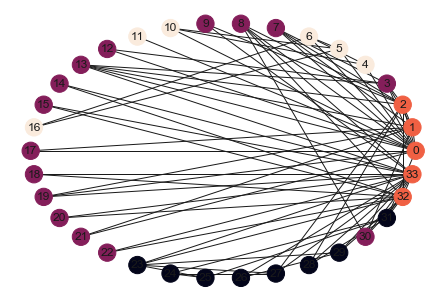

In [164]:
test_search = launch_TabuSearch(40, G, 4, objective = Q_ML, modularity_name="likelihood")
nx.draw_circular(G, node_color=test_search, with_labels = True)

Here we are quite surprised to find that the classification obtained with the Likelihood modularity does not coincide at all with the results of the Bayesian modularity.

The criterion still isolates the club leaders and their supporters in the same group and divides the rest of the nodes in a fashion that is very different from the club seperation.

We check that this result is not due to a limitation of the Tabu Search ability to explore the set of solutions.

In [165]:
best_labels = club_labels.copy()
best_labels[0]=2
best_labels[1]=2
best_labels[2]=2
best_labels[33]=3
best_labels[32]=3
best_labels=[k+1 for k in best_labels]
print("Modularity of the club separation: ", Q_ML(best_labels, K=4))
print("Modularity of the first run: ", Q_ML(test_search, K=4))

Modularity of the club separation:  -0.12337652908225313
Modularity of the first run:  -0.12243363187069035


Looking at the previous results, it does not seem like the club seperation achieves a better Likelihood modularity than the solution returned by the Tabu Search. The node classification that we have obtained makes little sense with regards to what we know about the clubs and the result of the Bayesian modularity.

We have however only applied the MAP estimation to a specific and rather small network. The following section introduce the theorems that support the consistency of that estimate.

## 2.4 - Consistency of the MAP classifier

### a) Identifiability and consistancy

A classification $\hat{e}$ is said to be weakly consistent if the fraction of misclassified nodes tends to zero ; and strongly consistent if the probability of misclassifying any of the nodes tends to zero.

Because the way we enumerate the communities is arbitrary, consistency is defined up to a permutation of the labels. So if we let $\sigma$ be a permutation in $\{1, ..., K\}$ and $P_\sigma$ its matrix representation, we are looking for the existence of a permutation $\sigma$ that provides weak or strong consistency.

To formalise these notions, we introduce:

$$ R_{ab}(e,c) = \frac{1}{n} \sum_{i=1}^n 1\{e_i=a, c_i=b\} \qquad \text{for} \quad e, c \in \{1, ..., K\}^n$$

$$ f_a(e) = \frac{n_a(e)}{n} \qquad \text{for} \quad e \in \{1, ..., K\}^n$ $$

Now to express consistency, we use the following lemma:

---

**Lemma 2.2** : $ \forall e, c \in \{1, ..., K\}^n \qquad \frac{1}{n} \sum_{i=1}^n \mathbb{1}\{ c_i \neq e_i\} = \frac{1}{2} || Diag(f(c)) - R(e,c)||_1$

*Proof* : We have $ \sum_{a=1}^K R(e,c)_{aa} = \sum_{a=1}^K \frac{1}{n} \sum_{i=1}^n \mathbb{1}\{e_i=a, c_i=a\} = \frac{1}{n} \sum_{i=1}^n \mathbb{1}\{e_i=c_i\} \qquad \text{so} \qquad \frac{1}{n} \sum_{i=1}^n \mathbb{1}\{ c_i \neq e_i\} = 1 - \sum_{a=1}^K R(e,c)_{aa} $.

Now, $ \sum_{a, b} R(e,c)_{ab} = 1 \qquad \text{so} \qquad 1 - \sum_{a=1}^K R(e,c)_{aa} = \sum_{a\neq b} R(e,c)_{ab}$.

Moreover $ 1 - \sum_{a=1}^K R(e,c)_{aa} = \sum_{a=1}^K f_a(e) - R(e,c)_{aa} = \sum_{a\neq b} R(e,c)_{ab}$.

Finally $ || Diag(f(c)) - R(e,c)||_1 = \sum_{a=1}^K f_a(e) - R(e,c)_{aa} + \sum_{a\neq b} R(e,c)_{ab} = 2 \sum_{a=1}^K f_a(e) - R(e,c)_{aa}$.

Gathering all this we get $ \frac{1}{n} \sum_{i=1}^n \mathbb{1}\{ c_i \neq e_i\} = \sum_{a=1}^K f_a(e) - R(e,c)_{aa} = \frac{1}{2} || Diag(f(c)) - R(e,c)||_1 $.

---

With this lemma, we can write that $\hat{e}$ is weakly consistent if $ \exists \sigma \quad \text{s.t.} \quad ||P_\sigma R(\hat{e}, Z) - Diag(f(Z))||_1 \longrightarrow 0$.

Similarly, $\hat{e}$ is strongly consistent if $ \exists \sigma \quad \text{s.t.} \quad \mathbb{P}(P_\sigma R(\hat{e}, Z) = Diag(f(Z))) \longrightarrow 1$.

A necessary requirement for consistency is that the classes can be recovered from the likelihood, which means that the model parameters must be identifiable. If every element of $\pi$ is strictly positive, this implies that $P$ should not have any identical rows, in this case $(\pi, P)$ is identifiable. In the case where some elements of $\pi$ are null, only the part of $P$ that do not consider those empty communities are possibly identifiable. In this case, we say that $(\pi, P)$ is identifiable if after removing the rows and columns associated to the empty communities from P, the reducted couple is identifiable.


### b) Weak consistency

In this section, we introduce the central theorem of the article that states the conditions for the consistency of the MAP classifier $\hat{e} = argmax_e Q_B(e)$.

---

**Theorem 2.1** : This theorem states the conditions of weak consistency under the non-sparse and the sparse setups.

- If $(\pi, P)$ is fixed and identifiable, then the MAP classifier $\hat{e} = argmax_e Q_B(e)$ is weakly consistent.

- If $P=\rho_nS$ for $\rho_n \longrightarrow 0$ and $(\pi, S)$ fixed and identifiable with $S>0$ and $\pi>0$, then the MAP classifier $\hat{e}$ is weakly consistent if $n\rho_n \gg log^2(n)$.

*Proof* : 

1. We will start by showing the proximity of $\hat{e}$ the MAP classifier to $Z$ the random variable of the nodes labellings with regards to another statistic before applying that to the two cases presented in the theorem.

We introduce :
- $\tilde{O} \in \mathbb{R}^{K\times K} \quad s.t. \quad \tilde{O}_{ab}(e) = O_{ab}(e) \quad \text{if} \quad a\neq b \quad \text{and} \quad \tilde{O}_{ab}(e) = 2 O_{ab}(e) \quad \text{otherwise} $
- $ \text{for} \quad u \in [0, 1] \quad \text{let} \quad \tau(u) = u log(u) + (1-u)log(1-u) $
- $\mathbb{L}(e) = \frac{1}{2 n^2} \sum_{a,b} n_a(e) n_b(e) \tau(\frac{\tilde{O}_{ab}(e)}{n_a(e)n_b(e)})$.

We have 

$ Q_{ML}(e) = \frac{1}{n^2} \sum_{1 \leq a \leq b \leq K} n_{ab}(e) \tau(\frac{O_{ab}(e)}{n_{ab}(e)})$

$ \qquad \quad \, = \frac{1}{n^2} \left[ \sum_{a=1}^K \frac{n_a(e)(n_a(e)-1)}{2} \tau(\frac{\tilde{O}_{aa}(e)}{n_a(e)(n_a(e)-1)}) + \sum_{a<b} n_a(e) n_b(e) \tau(\frac{\tilde{O}_{ab}(e)}{n_a(e)n_b(e)}) \right]$

$ \qquad \quad \, = \frac{1}{2 n^2} \left[ \sum_{a=1}^K n_a(e)(n_a(e)-1) \tau(\frac{\tilde{O}_{aa}(e)}{n_a(e)(n_a(e)-1)}) + \sum_{a\neq b} n_a(e) n_b(e) \tau(\frac{\tilde{O}_{ab}(e)}{n_a(e)n_b(e)}) \right] $

$ \Longrightarrow | Q_{ML}(e) - \mathbb{L}(e) | \leq \frac{1}{2 n^2} \left[ \sum_{a=1}^K | n_a(e)(n_a(e)-1) \tau(\frac{\tilde{O}_{aa}(e)}{n_a(e)(n_a(e)-1)}) - n_a(e)^2 \tau(\frac{\tilde{O}_{aa}(e)}{n_a(e)^2}) | \right]$

Now using lemma 2.3, 

$ | Q_{ML}(e) - \mathbb{L}(e) | \leq \frac{1}{2 n^2} \left[ \sum_{a=1}^K n_a(e)(n_a(e)-1) | \tau(\frac{\tilde{O}_{aa}(e)}{n_a(e)(n_a(e)-1)}) - \tau(\frac{\tilde{O}_{aa}(e)}{n_a(e)^2}) | + | n_a(e)(n_a(e)-1) - n_a(e)^2 | | \tau(\frac{\tilde{O}_{aa}(e)}{n_a(e)^2}) | \right] $

$ \qquad \qquad \qquad \; \leq \frac{1}{2 n^2} \left[ \sum_{a=1}^K n_a(e)(n_a(e)-1) l(\frac{\tilde{O}_{aa}(e)}{n_a(e)^2(n_a(e)-1)}) + n_a(e) \| \tau \|_\infty \right] $

$ \qquad \qquad \qquad \; \leq \frac{1}{2 n^2} \left[ \sum_{a=1}^K n_a(e)^2 l(\frac{\tilde{O}_{aa}(e)}{n_a(e)^2(n_a(e)-1)}) \right] + \frac{\| \tau \|_\infty}{2 n}  $

$ \qquad \qquad \qquad \; \leq \frac{1}{2 n^2} \left[ \sum_{a=1}^K n_a(e) log(n) \right] + \frac{\| \tau \|_\infty}{2 n} \qquad \text{because} \quad n_a l(\frac{u}{n_a}) \lesssim log(n_a) \leq log(n) \quad \text{for} \quad u \in [0,1] $

Which means that $ | Q_{ML}(e) - \mathbb{L}(e) | \leq \frac{log n}{2 n} + \frac{\| \tau \|_\infty}{2 n} = \mathcal{O}(\frac{log n}{n}) $.

Thanks to lemma 2.1, we also know that the Bayesian modularity is equivalent to the Linkelihood modularity up the order $\frac{log n}{n}$. 

Using that, we finally have $ \eta_{n,1} = max_e | Q_B(e) - \mathbb{L}(e) | = \mathcal{O}(\frac{log n}{n})$.

And, having $Q_B(\hat{e}) \geq Q_B(Z)$ almost surely by definition of the MAP, we have $\mathbb{L}(Z) - \mathbb{L}(\hat{e}) \leq 2 \eta_{n,1}$.

We now wish to replace $\tilde{O}$ by its asymptotic equivalent in $\mathbb{L}$.

To do so, we use Lemma 2.4 for $x = x_n = M \frac{\|P\|_\infty^{1/2} \lor \sqrt{n}}{\sqrt{n}}$ with $M\gg1$ large enough. In this case we have the right side of the inequality tending to 0 when $n$ tends to $+ \infty$. Thus for all $\epsilon>0$, there exists $M>0$ and $n_0>0$ such that

$$ \mathbb{P}(max_e \|\tilde{O}(e) - \mathbb{E}(\tilde{O}(e)|Z)\|_\infty > x_n n^2) \leq 2 K^{n+2} e^{-\frac{x_n^2 n^2}{8\|P\|_\infty + 4x_n/3}} < \epsilon $$

This is the definition of order in probability and $ \frac{max_e \|\tilde{O}(e) - \mathbb{E}(\tilde{O}(e)|Z)\|_\infty}{n^2} = \mathcal{O}_\mathbb{P}(\frac{\|P\|_\infty^{1/2} \lor \sqrt{n}}{\sqrt{n}}) $.

Now, to obtain an explicit appromation of $\mathbb{E}(\tilde{O}(e) | Z)$, we use Lemma 2.5, for $R(e,Z) \in \mathbb{R}^{K\times K}$ with $ R_{ab}(e,Z) = \frac{1}{n} \sum_{i=1}^n \mathbb{1}(e_i=a, Z_i=b)$

$$ \mathbb{E}(\tilde{O}(e) | Z) = n^2R(e,Z)PR(e,Z)^T - n Diag(R(e,Z) diagP) $$

Which gives $ max_e \| \frac{1}{n^2} \mathbb{E}(\tilde{O}(e) | Z) -  R(e,Z)PR(e,Z)^T \|_\infty = max_e \| \frac{1}{n} Diag(R(e,Z) diagP) \|_\infty$.

Moreover $ \left( R(e,Z) diagP \right)_a = \frac{1}{n} \sum_b P_{bb} \sum_i \mathbb{1}(e_i=a, Z_i=b) \leq \frac{1}{n} \sum_b P_{bb} n_b(e) \leq \frac{1}{n} \sum_b  n_b(e) = 1 $.

So $ max_e \| \frac{1}{n} Diag(R(e,Z) diagP) \|_\infty \leq  \frac{1}{n} \longrightarrow 0$ and $ max_e \| \frac{1}{n^2} \mathbb{E}(\tilde{O}(e) | Z) -  R(e,Z)PR(e,Z)^T \|_\infty \longrightarrow 0 $.

Now we can introduce $L$ the asymptotic equivalent of $\mathbb{L}$ : $ L(e) = \frac{1}{2} \sum_{a,b} f_a(e) f_b(e) \tau \left( \frac{(R(e,Z)PR(e,Z)^T)_{ab}}{f_a(e)f_b(e)}\right)$

Using again Lemma 2.3, we can quantify the difference between $\mathbb{L}$ and its asymptotic equivalent,

$ \qquad max_e |\mathbb{L}(e) - L(e)| = max _e \frac{1}{2} | \sum_{a,b} f_a(e)f_b(e) \tau\left( \frac{n^{-2} \tilde{O}_{ab}(e)}{f_a(e)f_b(e)}\right) - \sum_{a,b} f_a(e) f_b(e) \tau \left( \frac{(R(e,Z)PR(e,Z)^T)_{ab}}{f_a(e)f_b(e)}\right) | \\
\qquad \qquad \qquad \leq max _e \frac{1}{2} \sum_{a,b} | f_a(e)f_b(e) \tau\left( \frac{n^{-2} \tilde{O}_{ab}(e)}{f_a(e)f_b(e)}\right) - f_a(e) f_b(e) \tau \left( \frac{(R(e,Z)PR(e,Z)^T)_{ab}}{f_a(e)f_b(e)}\right) | \\
\qquad \qquad \qquad \leq max _e \frac{1}{2} \sum_{a,b} l\left( | n^{-2} \tilde{O}_{ab}(e) - (R(e,Z)PR(e,Z)^T)_{ab} | \right) \\
\qquad \qquad \qquad \leq max _e \frac{1}{2} \sum_{a,b} l\left( \| n^{-2} \tilde{O}(e) - R(e,Z)PR(e,Z)^T \|_\infty \right) \qquad \text{because l is increasing}$

And using the previous results : $\| n^{-2} \tilde{O}(e) - R(e,Z)PR(e,Z)^T \|_\infty = \| n^{-2} \tilde{O}(e) - n^{-2} \mathbb{E}(\tilde{O}(e)|Z) + \mathbb{E}(\tilde{O}(e)|Z) - R(e,Z)PR(e,Z)^T \|_\infty = \mathcal{O}_\mathbb{P}(\frac{\|P\|_\infty^{1/2} \lor \sqrt{n}}{\sqrt{n}}) $

Which means that $ \eta_{n,2} = max_e |\mathbb{L}(e) - L(e)| = \mathcal{O}_\mathbb{P}(l(\frac{\|P\|_\infty^{1/2} \lor \sqrt{n}}{\sqrt{n}})) $.

We deduce that $ L(Z) - L(\hat{e}) \leq L(Z) - \mathbb{L}(Z) + \mathbb{L}(\hat{e}) - L(\hat{e}) + \mathbb{L}(Z) - \mathbb{L}(\hat{e}) \leq 2(\eta_{n,1} + \eta_{n,2})$

2. We consider the first setup of the theorem where $(P, \pi)$ is fixed and identifiable.

Let $ R_\delta = \{ R \; \text{probability matrix} \; s.t \; min_{P_\sigma} \| P_\sigma R - Diag(R^T \mathbb{1})\|_1 \geq \delta \; \text{and} \; min_{a : \pi_a>0} (R^T\mathbb{1})_a \geq \delta \}$ for a given $\delta >0$.

We introduce $H_P(R) = \frac{1}{2} \sum_{a,b} (R\mathbb{1})_a (R\mathbb{1})_b \tau\left( \frac{(RPR^T)_{ab}}{(R\mathbb{1})_a (R\mathbb{1})_b} \right)$ for $R \in \mathbb{R}^{K\times K}$.

This function is such that $L(e) = H_P(R(e,Z))$ and $L(Z) = H_P(R(Z,Z)) = H_P(Diag(f(Z)) = H_P(Diag(R(e,Z)^T \mathbb{1})$.

Now we can make the connection between this and $R_\delta$ and set $\eta = \eta_n = inf_{R \in R_\delta} H_P(Diag(R^T\mathbb{1}) - H_P(R)$.

Because $R_\delta$ is a subset of the probability matrices, it is bounded, and because it is the reciprocal image of a closed ensemble for a continuous function, it is also closed. Thus $R_\delta$ is a compact ensemble. We also have the continuity of $H_P(Diag(R^T\mathbb{1}) - H_P(R)$ which implies that $\eta$ is well defined and there exists $R \in R_\delta$ that realises this minimum.

By definition of $R_\delta$, no matrix $R$ in $R_\delta$ can be transformed in a diagonal matrix by permuting its rows and it necessarily has non-zero elements in every column $a$ where $\pi_a>0$. We can thus use Lemma 2.6 : $ \forall R \in R_\delta \quad H_P(R) < H_P(Diag(R^T \mathbb{1}))$ which implies that $\eta_n > 0$.

Using the result in part 1. of the proof and what we just showed, if $R(\hat{e},Z) \in R_\delta$

$$ 0 < \eta_n \leq H_P(Diag(R(\hat{e},Z)^T \mathbb{1})) - H_P(R(\hat{e},Z)) = L(Z) - L(\hat{e}) \leq 2(\eta_{n,1} + \eta_{n,2}) $$

Because here, $\eta_n = \eta $ does not depend on n and is strictly positive, there exists $n_0>0$ such that $\forall n \geq n_0 \quad 2(\eta_{n,1} + \eta_{n,2}) < \eta_n$ and in this case $R(\hat{e},Z) \notin R_\delta$.

Because of the law of large number $R(\hat{e},Z)^T \mathbb{1} \longrightarrow \pi$, so, for n large enough and a $\delta$ small enough, $R(\hat{e},Z)$ satisfies the second condition of $R_\delta$. So, if $R(\hat{e},Z) \notin R_\delta$, it means that there exists $P_\sigma$ such that $\| P_\sigma R - Diag(R^T \mathbb{1})\|_1 \leq \delta$. If this inequality is true for a small enough $\delta$ than it is also true for a large $\delta$.

We have thus proven that $\forall \delta>0, \quad \exists n_1>0 \; \text{and} \; P_\sigma : \forall n\geq n_1 \quad \| P_\sigma R - Diag(R^T \mathbb{1})\|_1 \leq \delta $.

This means that $ min_{P_\sigma} \| P_\sigma R - Diag(R^T \mathbb{1})\|_1 \overset{\mathbb{P}}{\longrightarrow} 0 $ and we proved the weak consistency of $\hat{e}$.

3. We now consider the second setup where $P=\rho_n S$.

Using Lemma 2.7, we have for a given series $\rho_n \longrightarrow 0$, $\frac{1}{\rho_n} \left( H_{\rho_n S}(Diag(R^T \mathbb{1}) - H_{\rho_n S}(R) \right) \longrightarrow G_S(Diag(R^T\mathbb{1}) - G_S(R) > 0$.

This time $\eta_n = inf_{R \in R_\delta} H_P(Diag(R^T\mathbb{1}) - H_P(R)$ depends on n. It is however bounded below by $\rho_n$ times a strictly positive number that solely depends on $(S, \pi)$.

Thus, if we have $\rho_n \gg \eta_{n,1} + \eta_{n,2}$, for $n$ large enough, we can use the same reasoning as we did in the previous part for $2(\eta_{n,1} + \eta_{n,2}) < \eta_n$ and we have the weak consistency of $\hat{e}$.

And $\rho_n \gg \eta_{n,1} + \eta_{n,2} \Leftrightarrow \rho_n \gg \frac{logn}{n} + \frac{log(\sqrt{n/\rho_n})}{\sqrt{n/\rho_n}} \Leftrightarrow n\rho_n \gg log(\frac{n}{\rho_n})^2$ 

---

The following are the lemmas used in the previous proof.

---

**Lemma 2.3** : The function $\tau : [0,1] \longrightarrow \mathbb{R} $ satisfies

$$ \forall x,y,v \in [0,1], \qquad |v \tau(\frac{x}{v}) - v \tau(\frac{y}{v}) | \leq l(|x-y|) $$

With $ l(x) = 2x(1\lor log(\frac{1}{x}))$

---

**Lemma 2.4** : For $\tilde{O}$ as previously defined and for any $ x>0 $

$$ \mathbb{P}(max_e \|\tilde{O}(e) - \mathbb{E}(\tilde{O}(e)|Z)\|_\infty > x n^2) \leq 2 K^{n+2} e^{-\frac{x^2 n^2}{8\|P\|_\infty + 4x/3}} $$

---

**Lemma 2.5** : For $\tilde{O}$ and $R(e,Z)$ as previously defined,

$$ \mathbb{E}(\tilde{O}_{ab}(e) | Z) = n^2 \left( R(e,Z)PR(e,Z)^T - n Diag(R(e,Z) diagP) \right)_{ab} $$

---

**Lemma 2.6** : For any probability matrix $R$

$$ H_P(R) \leq H_P(Diag(R^T\mathbb{1})) $$

Furthermore, if $(P,\pi)$ is identifiable and the columns of $R$ corresponding to positive coordinates of $\pi$ are not identically zero, then the inequality is strict unless there exists some permutation $\sigma$ such that $ P_\sigma R$ is a diagonal matrix.

---

**Lemma 2.7** : For any matrix $P \in \mathbb{R}^{K\times K}$ fixed with its elements in $[0,1]$ and R a probability matrix, for $\rho_n \longrightarrow 0$

$$ \frac{1}{\rho_n} \left( H_{\rho_n P}(Diag(R^T \mathbb{1}) - H_{\rho_n P}(R) \right) \longrightarrow G_P(Diag(R^T\mathbb{1}) - G_P(R) $$

Furthermore, if $(P,\pi)$ is identifiable and the columns of $R$ corresponding to positive coordinates of $\pi$ are not identically zero, then the right side of this inequality is strictly positive unless there exists some permutation $\sigma$ such that $ P_\sigma R$ is a diagonal matrix.

---


### c) Strong consistency

The article also provides conditions for the strong consistency of the MAP classifier.

--- 

**Theorem 2.2** : This theorem states the conditions of strong consistency under the non-sparse and the sparse setups.

- If $(\pi, P)$ is fixed and identifiable with $0<P<1$ and $\pi>0$, then the MAP classifier $\hat{e} = argmax_e Q_B(e)$ is strongly consistent.

- If $P=\rho_nS$ for $\rho_n \longrightarrow 0$ and $(\pi, S)$ fixed and identifiable with $S>0$ and $\pi>0$, then the MAP classifier $\hat{e}$ is strongly consistent if $n\rho_n \gg log^2(n)$.

--- 

The proof of this theorem relies mainly on the weak consistency of the MAP classifier and some additional lemmas.

### d) Illustration on an example

In this section, we wanted to test the result of those theorems and illustrate it with a given example $(P, \pi)$.

To do so, we constructed graphs with the same $(P, \pi)$ and an increasing number of nodes. We wanted to track the evolution of the proportion of misclassified nodes.

The two functions below are responsible for initialising the couple $(P, \pi)$ fixed and identifiable and building a corresponding graph, being provided the number of nodes and communities wished for.

In [7]:
def get_pi_P(nb_communities):
    '''
    This functions returns a set of probability associated to each community as well as a matrix giving the 
    probabilities of nodes to be connected when considering their community
    Args:
        nb_communities: the number of non-empty communities wished for
    '''
    # Generate the probabilities associated with each class
    PIs = np.random.dirichlet([0.5]*nb_communities, size = 1)
    
    # Generate the probabilities of connecting different communities
    P=np.zeros((nb_communities, nb_communities))
    for i in range(nb_communities):
        # higher chances of being connected if nodes are in the same commmunity (mean 0.5)
        P[i,i] = np.random.beta(5, 5) 
        for j in range(i+1, nb_communities):
            # lower chances of being connected if nodes are in different communities
            # the matrix P is symmetric
            P[i,j] = np.random.beta(1, 10)
            P[j,i] = P[i,j]
    return PIs, P

def build_SBM(PIs, P, nb_nodes, nb_communities):
    '''
    This function builds a SBM graph being provided the probabilities associated with each community and 
    the probabilities of connecting different communities
    Args:
        PIs: probabilities associated with each community
        P: matrix of the probalities of nodes being connected with regards to the community they belong to
        nb_nodes: the number of nodes we want to be in the graph
        nb_communities: the number of communities we want to have in the graph
    '''
    # Generate the true communities
    e=list(np.apply_along_axis(lambda x: np.argmax(x)+1, 1, np.random.multinomial(1, PIs[0], nb_nodes)))
    # we ensure that every community appears at least once in the sample
    while len(set(e))<nb_communities:
        missing=list(set(range(1, nb_communities+1)) - set(e))
        shuffle_id = np.arange(nb_nodes)
        np.random.shuffle(shuffle_id)
        new_assignment=shuffle_id[:len(missing)*round(nb_nodes*0.1)]
        missing = [m for m in missing for _ in range(3)]
        for m, p in zip(missing, new_assignment):
            e[p]=m
    
    # Add the nodes to the graph, along with their community label
    SBM_graph = nx.Graph()
    SBM_graph.add_nodes_from([(i, {"community":e[i]}) for i in range(nb_nodes)])
    
    # Add the edges to the graph
    for i in range(nb_nodes):
        for j in range(i+1, nb_nodes):
            connected=np.random.binomial(1, P[e[i]-1,e[j]-1])
            if connected==1:
                SBM_graph.add_edge(i,j)
    return SBM_graph

To estimate the proportion of misclassified nodes as a function of the number of nodes in the graph, we considered the following algorithm :

- Choose a couple $(\pi, P)$ to consider for all the graphs

- For each number of nodes considered :

    - Build 10 graphs with the same number of nodes, all associated with the couple $(\pi, P)$ and store the associated community labels
    
    - For each graph, run a Tabu Search to find the estimated communities.
    
    - Compare the estimated communities with the true communities for each graph and compute the misclassification rate by considering all the possible permutations of the labels
    
    - Average the misclassification rates across the 10 graphs to obtain an estimate of the misclassification rate for the number of nodes considered


In [21]:
def launch_fixed_simulation(nb_communities, max_nodes):
    '''
    This function builds a fixed set (pi, P) and creates graphs associated to these with an increasing number 
    of nodes. For each number of nodes considered, it builds 10 independent graphs, runs a Bayesian modularity
    TabuSearch on each of them and computes the mean proportion of ill-predicted nodes and the proportion of 
    exactly predicted graphs across those 10 graphs. 
    It returns the nodes numbers considered along with the computed proportions of ill-predicted nodes and 
    proportions of exactly predicted graphs.
    Args:
        nb_communities: number of communities considered in the graphs
        max_nodes: maximum numbre of nodes considered in those graphs (stepsize of 10 starting from 20) 
    '''
    node_evol = np.arange(20,max_nodes+1, 10)
    misclassified_rates = []
    error_rates = []
    communities_permutations = list(itertools.permutations(range(1, nb_communities+1)))
    
    # Initialise the couple (pi,P)
    PI_init, P_init = get_pi_P(nb_communities)
    
    for nb_nodes in node_evol:
        print("-------------------------------------------------------")
        print("Constructing and analysing 10 graphs with {} nodes...".format(nb_nodes))
        avg_mis_rate=0
        avg_err_rate=0
        for nb_graphs in range(10):
            # Build a SBM graph with the current number of nodes
            SBM_graph = build_SBM(PI_init, P_init, nb_nodes, nb_communities)
            truth = nx.get_node_attributes(SBM_graph, "community")
            truth = [com for (node, com) in truth.items()]
            # Run the TabuSearch with 20 different initialisations
            print("Analysing graph number {}".format(nb_graphs))
            res_search = launch_TabuSearch(20, SBM_graph, nb_communities, max_iter=1000, verbose=1)
            # Compute the missclassification rates and error rates
            mis_rate=1
            err_rate=0
            # We consider the permutation achieving the smallest missclassification and error rates
            for perm in communities_permutations:
                res_search_perm = [perm[i-1] for i in res_search]
                mis_rate_perm=sum([res_search_perm[i]!=truth[i] for i in range(nb_nodes)])/nb_nodes
                err_perm = (res_search_perm==truth)*1
                if mis_rate_perm<mis_rate:
                    mis_rate=mis_rate_perm
                if err_perm>err_rate:
                    err_rate=err_perm
            avg_mis_rate+=mis_rate
            avg_err_rate+=err_perm
        misclassified_rates.append(avg_mis_rate/10)
        error_rates.append(avg_err_rate/10)
        print("Done!")
    return PI_init, P_init, node_evol, misclassified_rates, error_rates
            

We launched the algorithm on a rather small maximum number of nodes and for only two communities. This illustration is thus really limited but it was not reasonable, computation-wise, to consider anything greater than that.

In [15]:
## Do not run !! Very long to go through
#PI_init, P_init, node_evol, misclassified_rates, error_rates = launch_fixed_simulation(2, 100)

-------------------------------------------------------
Constructing and analysing 10 graphs with 20 nodes...
Analysing graph number 0
Analysing graph number 1
Analysing graph number 2
Analysing graph number 3
Analysing graph number 4
Analysing graph number 5
Analysing graph number 6
Analysing graph number 7
Analysing graph number 8
Analysing graph number 9
Done!
-------------------------------------------------------
Constructing and analysing 10 graphs with 30 nodes...
Analysing graph number 0
Analysing graph number 1
Analysing graph number 2
Analysing graph number 3
Analysing graph number 4
Analysing graph number 5
Analysing graph number 6
Analysing graph number 7
Analysing graph number 8
Analysing graph number 9
Done!
-------------------------------------------------------
Constructing and analysing 10 graphs with 40 nodes...
Analysing graph number 0
Analysing graph number 1
Analysing graph number 2
Analysing graph number 3
Analysing graph number 4
Analysing graph number 5
Analysin

We now plot the misclassification rates along with the couple $(P, \pi)$ chosen for the graphs.

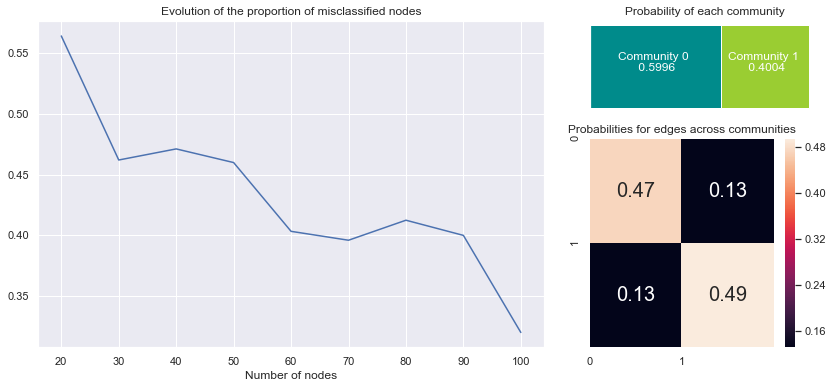

In [160]:
# Plotting the results

fig=plt.figure(figsize=(14,6))
grid = plt.GridSpec(3, 3, wspace=0.2, hspace=0.3, figure=fig)

ax1 = plt.subplot(grid[0:3, 0:2])
ax1.plot(node_evol, misclassified_rates)
ax1.set_title("Evolution of the proportion of misclassified nodes")
ax1.set_xlabel("Number of nodes")
ax2 = plt.subplot(grid[1:3, 2])
ax2=sns.heatmap(pd.DataFrame(P_init), xticklabels=1,ax = ax2, annot=True, annot_kws={"size": 20})
ax2.set_xticks(np.arange(2))
ax2.set_yticks(np.arange(3))
ax2.set_title("Probabilities for edges across communities")
ax3 = plt.subplot(grid[0, 2])
ax3.barh("", PI_init[0][0], 0.1, label='Community 0', color="darkcyan")
ax3.barh("", PI_init[0][1], 0.1, left=PI_init[0][0],
       label='Community 1', color="yellowgreen")
ax3.set_title("Probability of each community")

ax3.text(x=PI_init[0][0]/2, y=0.005, s="Community 0 \n {}".format(round(PI_init[0][0], 4)), 
        horizontalalignment='center', 
        verticalalignment='center', color="white", fontsize=12)

ax3.text(x=(PI_init[0][1] + 2*PI_init[0][0])/2, y=0.005, s="Community 1 \n {}".format(round(PI_init[0][1], 4)), 
        horizontalalignment='center', 
        verticalalignment='center', color="white", fontsize=12)

ax3.grid(False)
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_facecolor("white")


plt.show()

As we can see, we do observe a decreasing trend but with only a 100 nodes, we are far from observing any convergence to 0. 

Because the Tabu Search is really computationally expensive, we could not compute the misclassification rates for more nodes. This is a big limitation of this meta-heuristic and to really simulate the results of the theorems we would need to consider a more efficient optimisation process.

---
---
We saw in this section the approach presented in the main article. We illustrated it with simple example and proved its consistency under certain conditions.

However a big limitation of this approach remains the need to know in advance the right number of communities to look for. The following section will present the many approaches in the litterature that propose to also estimate K and discuss their feasability with regards to the Bayesian modularity maximisation.

---
---

# 3 - Number of communities 
The stochastic block model (SBM) is one of the best studied network models for community structures. A wide variety of methods have been proposed to estimate the latent community membership of nodes in an SBM. However, most of these works assume that the number of communities k is known a priori. In a realworld network, k is usually unknown and needs to be estimated. Therefore, it is of importance to investigate how to choose k. <br/> 
Because of the difficulties in finding a scientific paper relating to the method studied in part 2, we will study two different approaches: a statistical one and a dynamic one.


## 3.1 - A two-stage approach

The two-stage maximum likelihood approach first maps the vertices in the latent space and then uses a mixture model to cluster the resulting positions. Some methods have been proposed to estimate the number of communities. Here, we focus on the penalisation of the likelihood like the famous BIC or AIC approache, for SBM. <br/> 

For any fixed (P, z), the log-likelihood of the adjacency matrix A under the stochastic block model is 
$$ \log f(A|P_{ab} , z) = \sum_{1 \le a \le b \le k} ( O_{ab}(z) \log P_{ab} + ( n_{ab}(z) - O_{ab}(z) ) \log (1 - P_{ab} )) 
$$

Wang and Bickel (2017) proposed a penalized likelihood method with the penalty function $ \lambda \frac{k(k+1)}{2}n \log n $ where $\lambda$ is a tuning parameter. An alternative penalty function $ \frac{k(k+1)}{2} \log n $ (called the “BIC”) was used to select the number of communities in Saldana, Yu and Feng (2017)[22](https://www.tandfonline.com/doi/full/10.1080/10618600.2015.1096790?casa_token=now2U-dnRwwAAAAA%3AhKoXNB3DfutSHbLtM_WBcoQmk65qv3mYXJ3-d_kg77HRQBhHLF2_28qw4Cm1cxeoDuPQWN6P-7jERw). According to Hua, Qina, Yana and Zhaoc [23](https://arxiv.org/abs/1611.01238), this two estimators tend to respectively underestimate and overestimate the number on communities. They therefore propose a  “corrected Bayesian information criterion” (CBIC) that is in the midway of those two criteria. Specifically, the penalty function is $$ \lambda n \log k + \frac{k(k+1)}{2}\log n $$

Let Z be the set of all possible community assignments under consideration and let $\xi (z) $ be a prior probability of community assignment z. Assume that the prior density of $P_{ab}$ is given by $\Pi (P_{ab})$. Then the posterior probability of z is 
$$ P(z|A ) = \frac{g(A|z) \xi(z)}{\sum_{z \in Z} g(A|z) \xi(z)}$$

where g(A|z) is the likelihood of community assignment z, given by 
$$ g(A|z) = \int f(A| P_{ab}, z) \Pi(P_{ab}) dP_{ab}$$

Under the Bayesian paradigm, a community assignment $\hat z = max_{z \in [k]^n} g(A|z) \xi(z) $ that maximizes the posterior probability is selected ( $\sum_{z \in Z } g(A|z) \xi(z) $ is a constant).

 
They assume that Z is partitioned into $\cup_{k=1} Z_k$. Let $\tau (Z_k)$ be the size of $Z_k$. An equal probability is assigned to z in the same $Z_k$, i.e., $P(z|Z_k) = \frac{1}{\tau (Z_k)}$ for any z ∈ $Z_k$. Next, they assign $P(Z_k)$ proportional to $\tau^{−\delta}(Z_k)$ for some $\delta$. Where $\delta$ > 0 implies that a small number of communities are plausible while $\delta $ < 0 implies that a large number of communities are plausible. This results in the prior probability 
$$
\xi (z) = P(z|Z_k)P(Z_k ) \alpha \tau^{-\lambda} (Z_k)  \text{, $z \in Z_k$} 
$$
where $\lambda = 1 + \delta $. <br/>
This type of prior distribution on the community assignment suggests a corrected BIC criterion (CBIC) as follows:
$$ l(k) = max_{z \in [k]^n} {sup}_{P_{ab} \in \Theta_k} \log f(A| P_{ab}, z) - [\lambda n log k + \frac{k(k+1)}{2} \log n]$$

where the second term is the penalty and λ ≥ 0 is a tuning parameter. Then we estimate k by maximizing the penalized likelihood function:
$$ \hat k = arg max_k l(k) $$


### Asymptotics of the log-likelihood ratio 
In this section, we present the order of the log-likelihood ratio built on the work of Wang and Bickel (2017) [[24](https://projecteuclid.org/journals/annals-of-statistics/volume-45/issue-2/Likelihood-based-model-selection-for-stochastic-block-models/10.1214/16-AOS1457.full)] :
$$ 
L_{k,k'} = max_{z \in [k']^n} sup_{P_{ab} \in \Theta_{k'}} \log f(A|P_{ab}, z) - \log f(1|P_{ab}^*, z^*)
$$
where $P_{ab}^*$ and $z^∗$ are the true parameters. Further, k′ is the number of communities under the alternative model and k is the true number of communities. We are interested in the asymptotic distributions of $L_{k,k′}$. 

In the Corrected Bayesian information criterion for stochastic block models article, they split the cases k'<k, k'=k and k'>k. We do not prove all the result of this paper, but we give the condition to obtain the asymptotic distribution of the log-likelihood ratio. 

To obtain the asymptotic distribution of $L_{k,k′}$ , we need the following conditions :
- (A1) There exists $C_1 > 0$ such that $min_{1 \le a \le k} n_a \ge C_1 \frac{n}{k} $ for all n : The lower bound on the smallest community size requires that the size of each community is at least proportional to $\frac{n}{k}$. This condition was also used in Lei (2016).
- (A2) Any two rows of $P_{ab}^∗$ should be distinct :the merged model cannot be collapsed further to a smaller model.
- (A3) The entries of $P_{ab}^*$ are uniformly bounded away from 0 and 1 : the overall density of the network to be a constant.

**Theorem : Asymptotics of the log-likelihood ratio** Suppose that $A \sim P_{\theta ^* , z^*}$, under (A1) - (A3), and $\rho_n =1$.
- **Case 1 : k'< k**  
    If $k=o((n/ \log n)^{1/2} )$, we have  $ \frac{(n^{-1} L_{k,k'} - \eta \mu)}{\sigma(P_{ab} ^*)} \rightarrow	 N(0,1) $ 


    where 
$$
\mu = \frac{1}{n^2}(\sum_{ k' \le a \le b \le k} n'_{ab} ( P_{ab}' \log \frac{P'_{ab}}{ 1 - P'_{ab} } + log( 1- P'_{ab})) - \sum_{ k' \le a \le b \le k} n_{ab} ( P^*_{ab} \log \frac{P^*_{ab}}{ 1 - P^*_{ab} } + log( 1- P^*_{ab})))
$$
$$
\sigma^2 (P^*_{ab}) = \frac{1}{n^2}(\sum_{ k' \le a \le b \le k} n'_{ab} P'_{ab} (1 - P'_{ab} ) (\log \frac{P'_{ab}}{ 1 - P'_{ab} })^2 + \sum_{ k' \le a \le b \le k} n_{ab} P^*_{ab} (1 - P^*_{ab} ) (\log \frac{P^*_{ab}}{ 1 - P^*_{ab} })^2 
$$


- **Case 2 :  k' = k** 

    we have : $ 2(max_{z \in [k]^n} sup_{P_{ab} \in \Theta_k} \log f(A| P_{ab}, z ) - \log f(A| P_{ab}^*, z^* )) \rightarrow  \chi  ^2_{\frac{k(k+1)}{2}} $

- **Case 3 : k' > k** 

    As discussed in Wang and Bickel (2017)[[24](https://projecteuclid.org/journals/annals-of-statistics/volume-45/issue-2/Likelihood-based-model-selection-for-stochastic-block-models/10.1214/16-AOS1457.full)], it is difficult to obtain the asymptotic distribution of $L_{k,k′}$ in this case. For $k= o(n^{1/2})$, we have
$$
L_{k,k'} \le \alpha n \log k' (1 + o_p(1))
$$

    where $ 0 \le \alpha \le 1 - \frac{C}{\log k'} + \frac{2 \log n + \log k}{n \log k'}$



### Consistency of the CBIC 
We want to know if CBIC choose the correct k with probability tending to one when n goes to infinity. For that, we need an additional assumption  : 
 $$ \text{(A4) :     }  \frac{\eta \mu}{\log k} \rightarrow - \infty \text{, for k' < k} $$

**Theorem Consistency of the CBIC  :** Suppose that $A \sim P_{P_{ab} *, z *} $, (A1) - (A4) hold, and $ \rho_n =1 $. Let l(k) be the penalized likelihood function for the CBIC. If $k = o((\frac{n}{\log n})^{1/2})$, <br/> 
for k' < k, we have 
$$ P(l(k') > l(k) ) \rightarrow  0  $$
for k'> k, when $\lambda > \frac{\alpha \log k'} {\log k' - \log k }$ we have 
$$ P(l(k') > l(k))  \rightarrow  0  $$
where $\alpha$ is given in Theorem 3. 

By this theorem, the probability P(l(k') > l(k)) goes to zero, regardless of the value of the tuning parameter $\lambda$ in the case of $k'< k$. When $k' > k$, it depends on the parameter $\lambda$

the proof of this theorem is detailed in this article [Corrected Bayesian Information Criterion]. The Corrected Bayesian Information Criterion leads to a consistent estimator for the number of communities in SBM. 

### Other approaches

Other very popular method of community detection is variational Expectation Maximization (EM) algorithm - Xu et al (2012)[25](https://dl.acm.org/doi/10.1145/2213836.2213894). It is an iterative method to find maximum likelihood, where the model depends on unobserved latent variables. It could be very useful to estimate the number of communites, but criteria are not exactly the same. EM algorithm requires the knowledge of $p(Z|X,\alpha, \pi)$, which it is not tractable ( no conditional independence) in that type of model. Since $p(X|\alpha, \pi)$ is not tractable, we cannot rely on BIC criteria.  <br/> 
We take this opportunity to introduce the difference between Complete Data Likelihood and Observed Data Likelihood. Complete data likelihood is focusing on a cluster analysis view and favor well separated clusters,  implying some robustness against model misspecification, it is constructed assuming that the value of the latent variable$z_i$ is known,  MacKenzie, Hines 2018 [26](https://www.sciencedirect.com/science/article/pii/B9780124071971000065) ). Whereas the integrated observeddata likelihood is focussing on a density estimation view and is expected to provide a consistent estimation of the distribution of the data, Biernacki et al (2010)[27](https://hal.archives-ouvertes.fr/hal-00554344).

Back on topic, to tackle the issue of $p(Z|X,\alpha, \pi)$, Daudin et al (2008) [28](https://hal.inria.fr/inria-00070186/document) used a criterion, so-called ICL, based on an asymptotic approximation of the integrated complete-data likelihood. This criterion relies on the joint distribution $p(X,Z| \alpha, \pi)$ rather than $p(X|\alpha, \pi)$ and can be easily computed, even in the case of SBM. But, because it relies on an asymptotic approximation, Biernacki et al (2010) [27](https://hal.archives-ouvertes.fr/hal-00554344) showed, in the case of mixtures of multivariate multinomial distributions, that it may fail to detect interesting structures present in the data, for small sample sizes. 
To tackle this issue, Pierre Latouche, Etienne Birmele, Christophe Ambroise [28](https://arxiv.org/abs/0912.2873)propose a new criterion called ILvb, based on a non asymptotic approximation of the marginal likelihood.

In practice, this procedures of two-stage converges quickly but looses some information by not estimating the positions and the cluster model at the same time. Moreover, such procedures ignore uncertainty in the first stage and are prone to increased erroneous cluster assignments when there is inherent variability in the number of communities.  Conversely, the Bayesian algorithm, based on Markov Chain Monte Carlo, McDaid et al [29](https://www.sciencedirect.com/science/article/pii/S0167947312003891), Geng et al [30](https://arxiv.org/pdf/1602.08062.pdf), estimates both the latent positions and the mixture model parameters simultaneously.


## 3.2 - A modern MCMC techniques
Like in the paper of Van Der Pas and Van Der Vaart[9](https://direct.mit.edu/neco/article-abstract/24/9/2434/7799/Bayesian-Community-Detection), McDaid and Al 2013 [[29](https://www.sciencedirect.com/science/article/pii/S0167947312003891)] adopt the Bayesian approach of Nowicki and Snijders 2001 [[31](https://people.eecs.berkeley.edu/~jordan/sail/readings/nowicki-snijders.pdf)]. But, they treat K as a random variable with a given prior distribution. <br/> 
Given N (number of nodes ) and K (number of communities), the SBM describes a random process for assigning the nodes to clusters and then generating a network. Specifically, the cluster memberships are represented by a random vector Z of length N. $ Z_i$ taking values in a finite set {1,...,K} according to probabilities $\pi = \pi_1 , ..., \pi_K$. The prior on $\pi$ is a Dirichlet  :
 $$\pi \sim Dirichlet (\alpha, ..., \alpha ) $$
  This describes fully how the N nodes are assigned to the K clusters. Next we describe how, given this clustering z, the
edges are added between the nodes. <br/>
A network can be represented as an $N \times N$ adajency matrix $ A_{ij} $ represents the relation between node i and node j (taking values 1 or 0 ).

Given $Z = (Z_1,..., Z_n )$ the edges are independently generated as Bernoulli variables with $ P(A_{ij} = 1 | Z ) = P_{Z_i , Z_j } $ for i < j, for a given $K \times K $ symmetric matrix $P = (P_{ab})$. 
Each of the $P_{ab}$ is drawn from the conjugate Beta($\beta_1, \beta_2$) prior,
$$P_{ab} \sim Beta( \beta_1, \beta_2) $$ 
We assume $\alpha, \beta_1, \beta_2$ > 0. 

In summary, given N and K the random process generates $ P, Z, \pi $ and ultimately the network A. The two main variables of interest are the clustering Z and the network A.

We complete the bayesian model by specifying class labels $e = (e_1, ..., e_n )  $ and edges $A= (A_{ij} ) $through 
$$ e_i | \pi, P \sim \pi $$

$$ A_{ij}|\pi, P, e, K \sim Bernouilli ( P_{e_i , e_j}) $$ pour $ 1 \le i \le j \le n $

Like in section 2, we use collapsing to give a more convenient and efficient expression for the model. We treat K as a random variable and place a Poisson prior on K with rate $\lambda = 1$ , conditioning on K > 0, 
$$ K \sim Poisson(1) | K>0 $$
which gives us :
$$ P(K) = \frac{1}{K!(e-1)}$$ 
We can simply use $ P(K) \propto \frac{1}{K!} $

This Poisson prior allows the estimation of the number of clusters as an output of the model rather than requiring a user to specify K as an input. Thus, we have a fully Bayesian approach where, other than N, which is taken as given, every other quantity is a random variable with specified priors where necessary,
$$ p(A, P, e, \pi, K ) = P(K) \times p(e,\pi|K ) \times p(A, P |e)$$
With this equation we could create an algorithm which, given a network A, would allow us to sample the posterior $ P, e, \pi, K|A  $.
However, we are only interested in estimates of e, K|A, so we can collapse $P$  and $\pi$ : 
$$ P(A, e, K ) = P(K) \times \int_\Pi p(e,\pi|K ) d\pi \times \int_\Theta p(A, P |e) dP$$
Define $\Pi$ and $\Theta$ to be the domain of $\pi$ and $P$ .
 
This allows the creation of an algorithm which searches only over K and e. The algorithm never needs to concern itself with $\pi$ or $P$. Collapsing greatly simplifies the sample space over which the algorithm has to search. 

The integration (as in part 2) of the last equation allows an expression for the full posterior distribution to be obtained.
Let $n_a$ be the number of nodes in cluster a. $n_a$ is a function of e. Let $O_{ab}$ be the number of edges that exist in block ab, i.e. the block between clusters a and b. Let $n_{ab}$ be the maximum number of edges that can be formed between clusters a and b. For diagonal blocks, $n_{aa} = \frac{1}{2} n_a (n_a -1 )$ for undirected, no self-loops.

The full posterior may be written as : 
$$ P(A,e,K) \propto \frac{1}{K!} \times \frac{\Gamma(\alpha K) \prod_{a} \Gamma(n_a(e) + \alpha ) }{ \Gamma(\alpha)^K \Gamma(n + \alpha K) } \times \prod_{a \le b}  \frac{B ( \beta_1 + O_{ab} , n_{ab} - O_{ab} + \beta_2)}{B(\beta_1,  \beta_2 ) } $$
where B(.,.) is the Beta function. 

In this McDaid (2013) approach, they use a Markov chain Monte Carlo (MCMC) algorithm which samples, given a network A, from the posterior K,e|A. They develop an algorithm that searches across the full sample space of all possible clusterings for all K, drawing from the posterior e,K|A using the last posterior of P(A,e,K) as the desired stationary distribution of the Markov Chain. They use four moves :
- MK: Metropolis move increases or decreases the number of clusters by adding or removing an empty cluster. If MK is selected then the algorithm selects with 50% probability whether to attempt to add an empty cluster, or to delete one. If it chooses to attempt a delete, then one cluster is selected at random; if that cluster is not empty, then the attempt is abandoned. If it chooses to attempt an insert, it selects a new cluster identifier randomly from {1, . . . , K +1} for the new cluster and inserts a new empty cluster with that identifier, renaming any existing clusters as necessary.

- GS: Gibbs Sampling selects a node i at random to be assigned to a new cluster. All other nodes are kept fixed in their current cluster assignment i.e. a single element of the vector e is updated. 

- M3: Metropolis–Hastings on the labels in two clusters. This is the M3 move proposed in Nobile and Fearnside (2007). Two clusters are selected at random and the nodes are reassigned to the two clusters using a novel scheme fully described in that paper. K is not affected by this move.

- AE: In the absorb–eject AE move, a cluster is selected at random and split into two clusters, or else the reverse move can merge two clusters. This move therefore can both change the number of clusters K and change the clustering e. 

At each iteration, one of these four moves is selected at random. All the moves are essentially Metropolis–Hastings moves; a move to modify e and/or K is generated randomly, proposing a new state (e′, K′), and the  ratio of the new density to the old density $\frac{P(e' ,K |A )}{P(e, K|A )} = \frac{P(A,e',K)}{P(A,e,K)} $ is calculated. This is often quite easy to calculate quickly as, for certain moves, only a small number of factors are affected by the proposed move. We must also calculate the probability of this particular move being proposed, and of the reverse move being proposed. The proposal probability ratio is combined with the posterior mass ratio to give us the move acceptance probability,  
$$ min (1, \frac{P(A,e',K')}{P(A,e,K)}  \times  \frac{P_{prop}((K',e') \rightarrow (K,e))}{P_{prop}((K,e) \rightarrow (K',e'))} )$$
where $P_{prop}((K, e) \rightarrow (K′, e′))$ is the probability that the algorithm, given current state (K, e), will propose a move to (K′, e′).

With this algorithm they can both estimate the number of cluster and the attribution cluster of each nodes.

In the article of Sun and al. (2013) [32](https://www.nature.com/articles/srep01069), they use a same type of algorithm with a modularity objective function. When splitting and merging disciplines in the model, they compare the merged and split partitions and select the option with higher modularity.

## Conclusion

Community detection is a vast topic with many approaches. To better understand this topic, we used an educational approach by first implement a spectral clustering algorithm studied in course. On this same method, we showed that a normalisation of the Laplacian Matrix could improved the results. In other way, a modularity point of view can be used with spectral methods, but we chose to introduce the concept of modularity with the Girvan Newman algorithm. It is a very popular algorithm based on the betweenness centrality. Then we focused on a bayesian modularity approach. 


The Bayesian modularity maximisation approach provides a full posterior distribution of the labelling, thus providing great information on the model and its parameters. Here we only focused on the posterior mode and its consistency but other aspects of that distribution could be studied and used to quantify uncertainty for instance. <br/>
After applying that method to the toy example of the Karate club network, we were able to get a better sense of the particularity of that method compared to other approaches. The way it grouped nodes focused a lot on the similarity of behaviour, making groups emerge that other methods would have ignored. The fact that it singled out the group leaders is of great interests if one were to look at the hierarchical organisation of graphs. <br/>
The use of the Tabu Search as our optimisation method however, limited greatly our ability to play with bigger datasets. It would have been of interest to consider another and more efficient solver instead and apply the Bayesian modularity approach to other graphs. Moreover, the illustration of the consistency could greatly benefit from such an improvement.
Finally, the main drawback of this approach, as presented in the paper, is the absence of a prior on the number of communities considered.


In the last part, we studied one aspect of the discussion of Van Der Pas and Van Der Vaart : the estimation of the number of communities. Because of difficulties to find scientific papers related to bayesian approach based on modularity, we studied two differents well known process : a Corrected Bayesian Information Criterion and a Markov Chain Monte Carlo algorithm. The first one is a two-stage procedure. It converge quickly but looses some information by not estimating the positions and the cluster model at the same time. Moreover, such procedures ignore uncertainty in the first stage and are prone to increased erroneous cluster assignments when there is inherent variability in the number of communities. The second method, MCMC algorithm, estimates both the latent positions and the mixture model parameters simultaneously. It is sometimes stated that this dynamic approach is sometimes slower than other methods but we didn't measure that. It could be very interesting to implement these methods and compare them with both a the detection abilities and a computational approach. 

## References 

[1] Zachary WW - 1977 - An Information Flow Modelfor Conflict and
Fission in Small Groups 

[2] Girvan, Newman - 2002 - Community structure in social and biological networks

[3] Santo Fortunato - 2016 - Community detection in networks: A User Guide

[4] Von Luxburg - 2006 - A tutorial on spectral clustering 

[5] Ball, Karrer, Newman - 2011 - Efficient and principled method for detecting communities in networks

[6] Newman, Givan - 2004 - Finding and evaluating community structure in networks

[7] Pons, Latapy - 2005 - Computing Communities in Large Networks Using Random Walks - 2005. 

[8] Fienberg, Wasserman - 1981 - Categorical Data Analysis of Single Sociometric Relations

[9] S.L. Van Der Pas, A.W. Van Der Vaart  - 2016 - Bayesian Community Detection

[10] Holland, Laskey, Leinhardt - 1983 - Stochastic blockmodels: First steps

[11] Snijders, Nowicki - 1997 - Estimation and Prediction for Stochastic Blockmodels for Graphs with Latent Block Structure

[12] Donath and Hoffman - 1973 - Lower Bounds for the Partitioning of Graphs

[13] Fiedler - 1973 - Algebraic connectivity of graphs

[14] Shi, Malik - 2000 - Normalized cuts and image segmentation

[15] Ng, Jordan, Weiss - 2002 - On spectral Clustering : Analysis and an algorithm

[16] MacQueen - 1967 - Some methods for classification and analysis for multivariate observation

[17] Verma, Meila - 2003 - A Comparison of Spectral Clustering Algorithms

[18] Luxburg David, Pál - 2006 - A Sober Look at Clustering Stability

[19] Mohar - 1997 - Some applications of Laplace eigenvalues of graphs

[20] Von Luxburg , Bousquet , Belkin - 2004 - On the Convergence of Spectral Clustering on Random Samples: the Normalized Case

[21] Girvan, Newman - 2004 - Finding and evaluating community structure in networks

[22] Saldaña, Yu, Feng - 2015 - How Many Communities Are There?

[23] Hu, Qin, Yan, Zhao - 2019 - Corrected Bayesian information criterion for stochastic block models

[24] Wang, Bickel -2017 - Likelihood-based model selection for stochastic block models

[25]  Xu, Ke, Wang, Cheng, Cheng - 2012 -A model-based approach to attributed graph clustering

[26] MacKenzie, Hines- 2018 - Basic Presence/Absence Situation

[27] Biernacki C, Celeux G, Govaert G - 2010-  Exact and monte carlo calculations of integrated likelihoods for the latent class model. 

[28] Daudin , Picard, Robin - 2008 - A mixture model for random graph

[28] Latouche, Birmele, Ambroise - 2010 - Variational Bayesian inference and complexity control for stochastic block models

[29] McDaid, Murphy, Friel, Hurley - 2013 - Improved Bayesian inference for the stochastic block model with application to large networks

[30] Geng, Bhattacharya, Pati - 2019 - Probabilistic Community Detection With Unknown Number of Communities

[31] Nowicki, Snijders - 2001 - Estimation and Prediction for Stochastic Blockstructures

[32] Sun, Kaur, Milojević, Flammini, Menczer - 2013 -  Social Dynamics of Science